# (Cameras dataset Exploration)
## by (Elsayed Mokhtar Elsayed Abd Elrahman Zahy)


## Investigation Overview

> I think ongoing data analysis process differs depending on situation, for example, analyzing data for a supplier not the same as for a customer ,and even for a customer with basic list of devices and need to figure out which deal is best for this list is different from a customer without list but has a main interest in one feature and needs to know from the start what features achieves that goal or in other words what my feature of interest rely on, to put in consideration when taking decisions or for further conclusions techniques .

> In today's situation, analyzing and investigating dataset for a kind of electronic devices "cameras" to figure out how their price differs and based on which features to put in consideration for analysis or futher conclusion technique. So, we are going to answer our main question :

> > "Overall Question" : What does change of price depend on, based on this dataset ?  


## Dataset Overview

> Camera dataset from 'Kaggle.com' describes cameras information from different manufactures within period (1994:2007) evolving ten technological features, camera model, release date and price, gathered as some camera enthusiast went and described 1,000 cameras based on 13 properties! .

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
dff=pd.read_csv('camera_dataset.csv')

In [3]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    1038 non-null   object 
 1   Release date             1038 non-null   int64  
 2   Max resolution           1038 non-null   float64
 3   Low resolution           1038 non-null   float64
 4   Effective pixels         1038 non-null   float64
 5   Zoom wide (W)            1038 non-null   float64
 6   Zoom tele (T)            1038 non-null   float64
 7   Normal focus range       1038 non-null   float64
 8   Macro focus range        1037 non-null   float64
 9   Storage included         1036 non-null   float64
 10  Weight (inc. batteries)  1036 non-null   float64
 11  Dimensions               1036 non-null   float64
 12  Price                    1038 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 105.5+ KB


In [4]:
dff.describe()

Release date  Max resolution  Low resolution  Effective pixels  \
count   1038.000000     1038.000000     1038.000000       1038.000000   
mean    2003.590559     2474.672447     1773.936416          4.596339   
std        2.724755      759.513608      830.897955          2.844044   
min     1994.000000        0.000000        0.000000          0.000000   
25%     2002.000000     2048.000000     1120.000000          3.000000   
50%     2004.000000     2560.000000     2048.000000          4.000000   
75%     2006.000000     3072.000000     2560.000000          7.000000   
max     2007.000000     5616.000000     4992.000000         21.000000   

       Zoom wide (W)  Zoom tele (T)  Normal focus range  Macro focus range  \
count    1038.000000    1038.000000         1038.000000        1037.000000   
mean       32.963391     121.525048           44.145472           7.787850   
std        10.333149      93.455422           24.141959           8.100081   
min         0.000000       0.000000            0.000000           0.000000   
25%        35.000000      96.000000           30.000000           3.000000   
50%        36.000000     108.000000           50.000000           6.000000   
75%        38.000000     117.000000           60.000000          10.000000   
max        52.000000     518.000000          120.000000          85.000000   

       Storage included  Weight (inc. batteries)   Dimensions        Price  
count       1036.000000              1036.000000  1036.000000  1038.000000  
mean          17.447876               319.265444   105.363417   457.384393  
std           27.440655               260.410137    24.262761   760.452918  
min            0.000000                 0.000000     0.000000    14.000000  
25%            8.000000               180.000000    92.000000   149.000000  
50%           16.000000               226.000000   101.000000   199.000000  
75%           20.000000               350.000000   115.000000   399.000000  
max          450.000000              1860.000000   240.000000  7999.000000

#### Wrangling data :
- splitting "Model" column to two columns, "supplier_name" that describes manfacturer of devide, and "device_name" that describes manufacturer device number.
- Renaming columns to remove spaces or replace it with "_" if needed.
- Removing zero values as it doesn't make sense in any of technological features.

In [5]:
dff.Model.unique()

array(['Agfa ePhoto 1280', 'Agfa ePhoto 1680', 'Agfa ePhoto CL18', ...,
       'Toshiba PDR-M71', 'Toshiba PDR-M81', 'Toshiba PDR-T10'],
      dtype=object)

In [6]:
dff['supplier_name']=dff.Model.apply(lambda x:x.split(' ')[0])
dff['device_name']=dff.Model.apply(lambda x:x.split(' ')[1])

In [7]:
dff=dff.drop('Model',axis=1)

In [8]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Release date             1038 non-null   int64  
 1   Max resolution           1038 non-null   float64
 2   Low resolution           1038 non-null   float64
 3   Effective pixels         1038 non-null   float64
 4   Zoom wide (W)            1038 non-null   float64
 5   Zoom tele (T)            1038 non-null   float64
 6   Normal focus range       1038 non-null   float64
 7   Macro focus range        1037 non-null   float64
 8   Storage included         1036 non-null   float64
 9   Weight (inc. batteries)  1036 non-null   float64
 10  Dimensions               1036 non-null   float64
 11  Price                    1038 non-null   float64
 12  supplier_name            1038 non-null   object 
 13  device_name              1038 non-null   object 
dtypes: float64(11), int64(1)

In [9]:
dff.shape

(1038, 14)

In [10]:
dff.rename(columns={'Release date':'Release_date','Max resolution':'Max_resolution','Low resolution':'Low_resolution',
 'Effective pixels':'Effective_pixels',
 'Zoom wide (W)':'Zoom_wide(W)',
 'Zoom tele (T)':'Zoom_tele(T)',
 'Normal focus range':'Normal_focus_range','Macro focus range':'Macro_focus_range','Storage included':'Storage_included','Weight (inc. batteries)':'Weight(inc.batteries)','Dimensions':'Dimensions','Price':'Price','supplier_name':'supplier_name','device_name':'device_name'},inplace=True)

In [11]:
dff.columns

Index(['Release_date', 'Max_resolution', 'Low_resolution', 'Effective_pixels',
       'Zoom_wide(W)', 'Zoom_tele(T)', 'Normal_focus_range',
       'Macro_focus_range', 'Storage_included', 'Weight(inc.batteries)',
       'Dimensions', 'Price', 'supplier_name', 'device_name'],
      dtype='object')

In [12]:
df=dff
for x in df:
    b=df[df[x]==0]
    if len(b) != 0 :
        df.drop(index=b.index,inplace=True)        
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 5 to 1037
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release_date           774 non-null    int64  
 1   Max_resolution         774 non-null    float64
 2   Low_resolution         774 non-null    float64
 3   Effective_pixels       774 non-null    float64
 4   Zoom_wide(W)           774 non-null    float64
 5   Zoom_tele(T)           774 non-null    float64
 6   Normal_focus_range     774 non-null    float64
 7   Macro_focus_range      774 non-null    float64
 8   Storage_included       773 non-null    float64
 9   Weight(inc.batteries)  773 non-null    float64
 10  Dimensions             773 non-null    float64
 11  Price                  774 non-null    float64
 12  supplier_name          774 non-null    object 
 13  device_name            774 non-null    object 
dtypes: float64(11), int64(1), object(2)
memory usage: 90.7+ K

### What is the structure of your dataset?

> 773 rows * 14 columns : can be categorized as qualitative "supplier_name", "device_name", discrete "Release_date" [1998:2007], quantitive technological features('Max_resolution', 'Low_resolution', 'Effective_pixels', 'Zoom_wide(W)', 'Zoom_tele(T)', 'Normal_focus_range', 'Macro_focus_range', 'Storage_included', 'Weight(inc.batteries', 'Dimensions') and continuous "Price" .




### What is/are the main feature(s) of interest in your dataset?

> Price is the main feature of interest and how it's related to other features .

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think for first glimpse, that ("supplier_name", "Release_date", and all ten Technological features "'Max_resolution', 'Low_resolution', 'Effective_pixels','Zoom_wide(W)', 'Zoom_tele(T)', 'Normal_focus_range','Macro_focus_range', 'Storage_included', 'Weight(inc.batteries)','Dimensions'" ) could be related to change in price .

###### Limitations :

- I think adding life_cycle feature to describe if device is still in production "Active" or not "Obsolete" would be really helpful to measure price change based on life cycle status and other supply_chain data which i think would be related also . 

## Univariate Exploration


### Exploring price distribution
- From Here we can see that price is right skewed so we applied "Log-Scale" transformation and then other types of transformations to pick up best normally distributed data scale 
- Since we have applied "Log-Scale" we have got slightly skewed data we might try some other transformations (square root and cubic root, next!) . 


Text(0.5, 1.0, 'price distribution with multiplicative changes "Log Scale"')

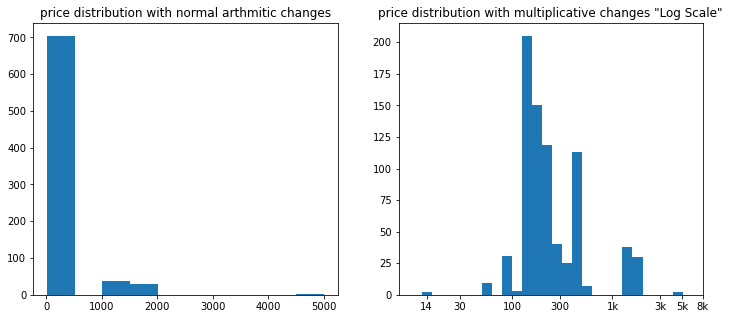

In [13]:
df['log_price']=np.log10(df.Price)
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.hist(df.Price)
plt.title('price distribution with normal arthmitic changes')
plt.subplot(1,2,2)
bins=np.arange(1,df.log_price.max()+.1,.1)
plt.hist(df.log_price,bins=bins)
a=np.log10([14,30,100,300,1000,3000,5000,8000])
c=['14','30','100','300','1k','3k','5k','8k']
plt.xticks(a,c);
plt.title('price distribution with multiplicative changes "Log Scale"')

### Applying price transformations



Text(0.5, 1.0, 'price distribution with multiplicative changes "SQRT Scale"')

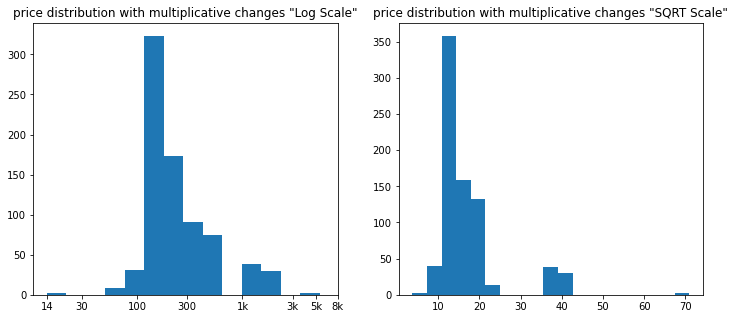

In [14]:
df['sqrt_price']=np.sqrt(df['Price'])
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
uu=df.log_price.max()/20
bins=np.arange(df.log_price.min(),df.log_price.max()+uu,uu)
plt.hist(df.log_price,bins=bins)
a=np.log10([14,30,100,300,1000,3000,5000,8000])
c=['14','30','100','300','1k','3k','5k','8k']
plt.xticks(a,c);
plt.title('price distribution with multiplicative changes "Log Scale"')
plt.subplot(1,2,2)
u=df['sqrt_price'].max()/20
bins=np.arange(df['sqrt_price'].min(),df['sqrt_price'].max()+u,u)
plt.hist(df['sqrt_price'],bins=bins)
a=np.sqrt([14,30,100,300,1000,3000,5000,8000])
c=['14','30','100','300','1k','3k','5k','8k']
#plt.xticks(a,c);
plt.title('price distribution with multiplicative changes "SQRT Scale"')

- We notice that cameras price is mostly inbetween(100:600) USD mainly peaked in log scaled plot between (100:300) USD with high outliers of few cameras around (5000) USD .

Text(0.5, 1.0, 'price distribution with multiplicative changes "CBRT Scale"')

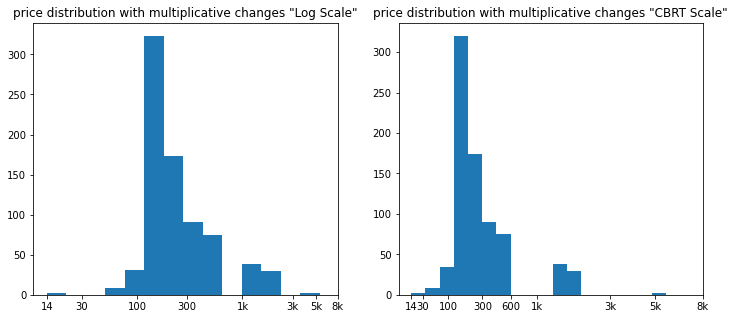

In [15]:
df['cbrt_price']=np.cbrt(df['Price'])
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
uu=df.log_price.max()/20
bins=np.arange(df.log_price.min(),df.log_price.max()+uu,uu)
plt.hist(df.log_price,bins=bins)
a=np.log10([14,30,100,300,1000,3000,5000,8000])
c=['14','30','100','300','1k','3k','5k','8k']
plt.xticks(a,c);
plt.title('price distribution with multiplicative changes "Log Scale"')
plt.subplot(1,2,2)
u=df['cbrt_price'].max()/20
bins=np.arange(df['cbrt_price'].min(),df['cbrt_price'].max()+u,u)
plt.hist(df['cbrt_price'],bins=bins)
a=np.cbrt([14,30,100,300,600,1000,3000,5000,8000])
c=['14','30','100','300','600','1k','3k','5k','8k']
plt.xticks(a,c);
plt.title('price distribution with multiplicative changes "CBRT Scale"')

- Again i think we still have "Log-Scale" as best choice and it's also rational as Price data are in large values, and we notice that cameras price is mostly inbetween(100:600) USD mainly peaked in log scaled plot between (100:300) USD with high outliers of few cameras around (5000) USD .

##### So, Now let's dive deeper with other features :"The ten Technological Features"
- Firstly, since we have them all quantitative data, then plotting histograms for all columns will be the choice, but we have found that almost all features are skewed, so we need to try other transformations hoping to have normaly distributed plot of data with multiplicative changes, thus getting robust linear relationship with price.
- Secondly, since we have positive data values, i have applied ("Log-Scale","SQRT-Scale","CBRT-Scale","Square-Scale") consequently for all data and draw histograms and a heatmap for correlation between price and data after each transformation to pick up best transformation type for each technological feature .  

## Normal-Scale

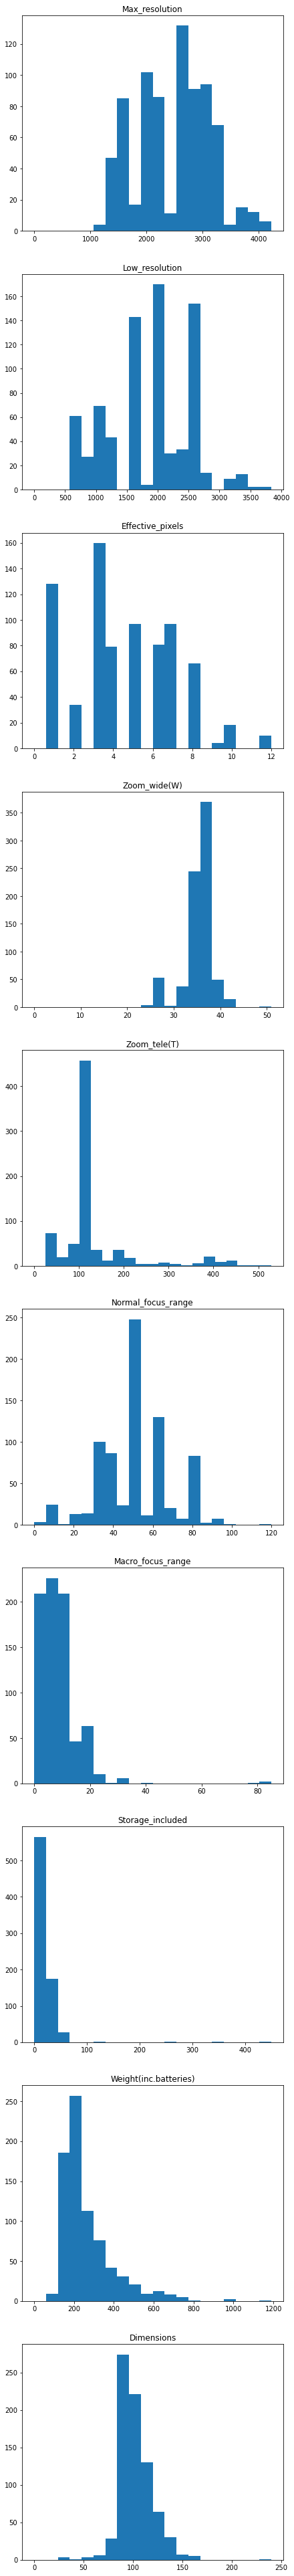

In [16]:
c=[ 'Max_resolution', 'Low_resolution', 'Effective_pixels',
       'Zoom_wide(W)', 'Zoom_tele(T)', 'Normal_focus_range',
       'Macro_focus_range', 'Storage_included', 'Weight(inc.batteries)',
       'Dimensions']
i=1
plt.figure(figsize=[7,70])
for x in c :
    u=df[x].max()/20
    bins=np.arange(0,df[x].max()+u,u)
    plt.subplot(len(c),1,i);
    plt.hist(df[x],bins=bins);
    plt.title(x);
    i +=1

### Price Correlation heatmap with normal scaled features

C:\Users\ENG\anaconda3\envs\life_cycle\lib\site-packages\pandas\core\frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


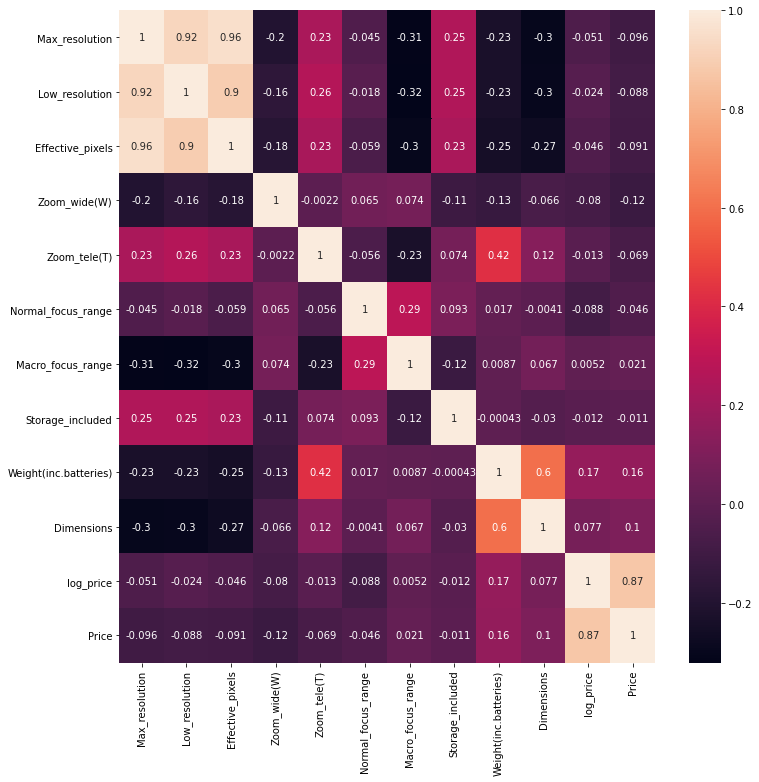

In [17]:
norm=df[['Max_resolution', 'Low_resolution', 'Effective_pixels',
       'Zoom_wide(W)', 'Zoom_tele(T)', 'Normal_focus_range',
       'Macro_focus_range', 'Storage_included', 'Weight(inc.batteries)',
       'Dimensions']]
normal=norm
normal[['log_price','Price']]=df[['log_price','Price']]
plt.figure(figsize=[12,12]);
sb.heatmap(normal.corr(),annot=True);


## Log-Scale

Text(0.5, 0.98, 'Log-scale')

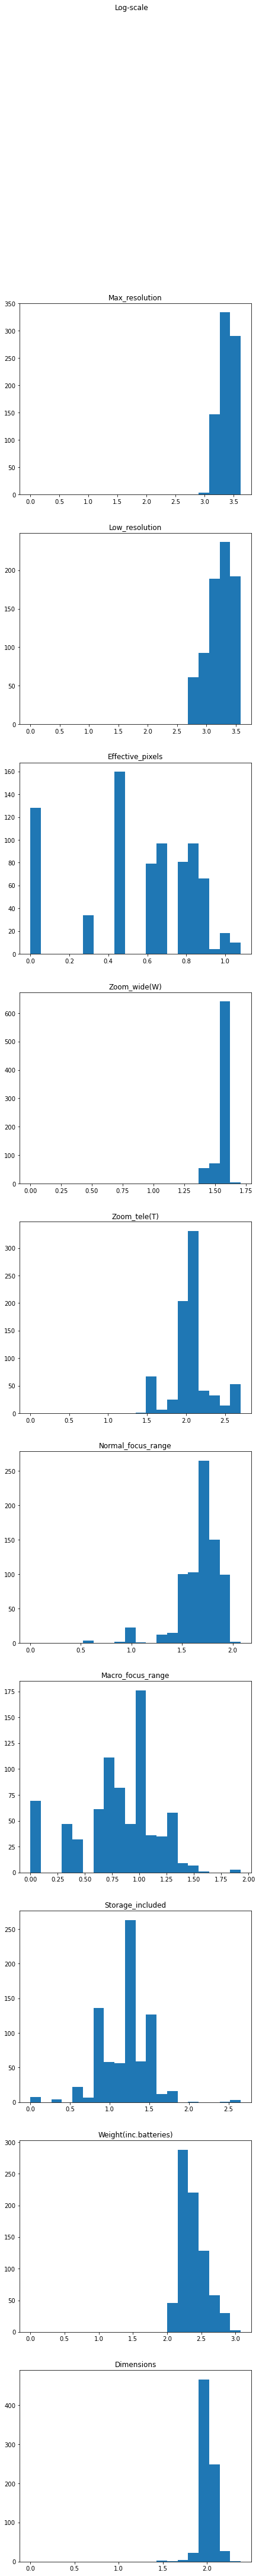

In [18]:
c=[ 'Max_resolution', 'Low_resolution', 'Effective_pixels',
       'Zoom_wide(W)', 'Zoom_tele(T)', 'Normal_focus_range',
       'Macro_focus_range', 'Storage_included', 'Weight(inc.batteries)',
       'Dimensions']
i=1
plt.figure(figsize=[7,70])
for x in c :
    u=np.log10(df[x].max())/20
    bins=np.arange(0,np.log10(df[x].max())+u,u)
    plt.subplot(len(c),1,i);
    plt.hist(np.log10(df[x]),bins=bins);
    plt.title(x);
    i +=1
plt.suptitle('Log-scale')

### Price Correlation heatmap with log scaled features

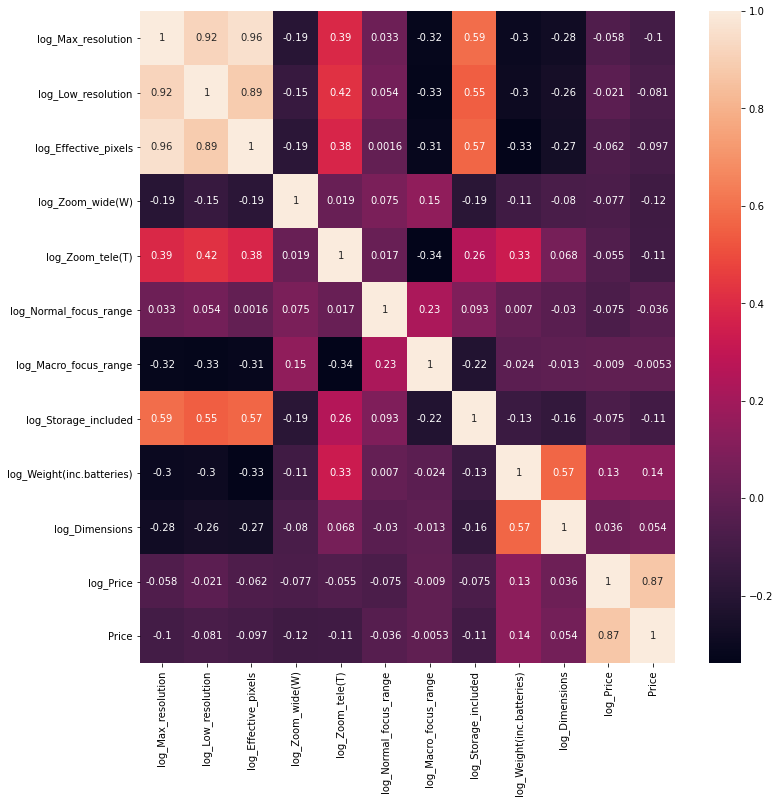

In [19]:
log=pd.DataFrame()
for x in norm:
    v="log_{}".format(x)
    log[v]=np.log10(norm[x])
log[['log_price','Price']]=df[['log_price','Price']]
log=log.drop(['log_log_price','log_price'],axis=1)
plt.figure(figsize=[12,12]);
sb.heatmap(log.corr(),annot=True);


## SQRT Scale

Text(0.5, 0.98, 'SQRT-scale')

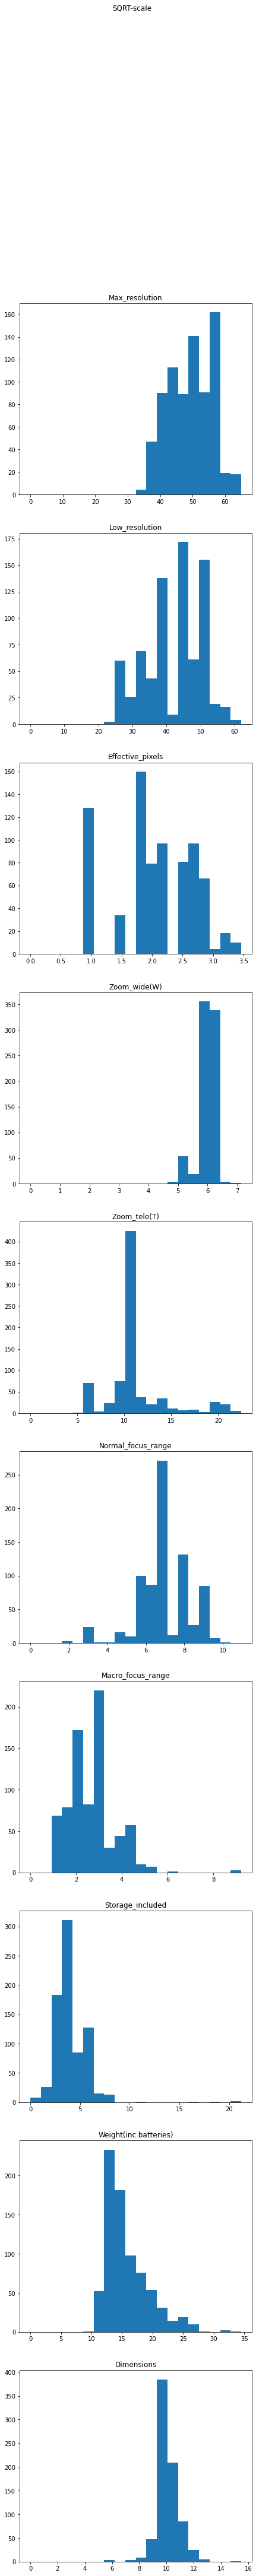

In [20]:
c=[ 'Max_resolution', 'Low_resolution', 'Effective_pixels',
       'Zoom_wide(W)', 'Zoom_tele(T)', 'Normal_focus_range',
       'Macro_focus_range', 'Storage_included', 'Weight(inc.batteries)',
       'Dimensions']
i=1
plt.figure(figsize=[7,70])
for x in c :
    u=np.sqrt(df[x].max())/20
    bins=np.arange(0,np.sqrt(df[x].max())+u,u)
    plt.subplot(len(c),1,i);
    plt.hist(np.sqrt(df[x]),bins=bins);
    plt.title(x);
    i +=1
plt.suptitle('SQRT-scale')

### Price Correlation heatmap with SQRT scaled features

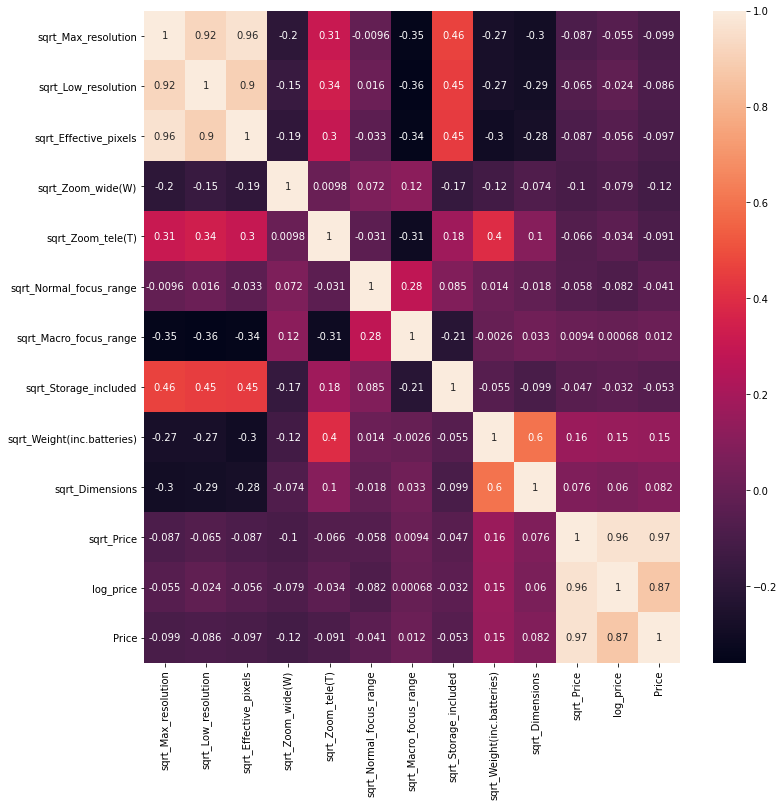

In [21]:
sqrt=pd.DataFrame()
for x in norm:
    v="sqrt_{}".format(x)
    sqrt[v]=np.sqrt(norm[x])
sqrt[['log_price','Price']]=df[['log_price','Price']]
sqrt=sqrt.drop(['sqrt_log_price'],axis=1)
plt.figure(figsize=[12,12]);
sb.heatmap(sqrt.corr(),annot=True);


- Zoom_wide, Zoom_tele, Normal_focus_range are better with SQRT scale

## CBRT-Scale

Text(0.5, 0.98, 'CBRT-scale')

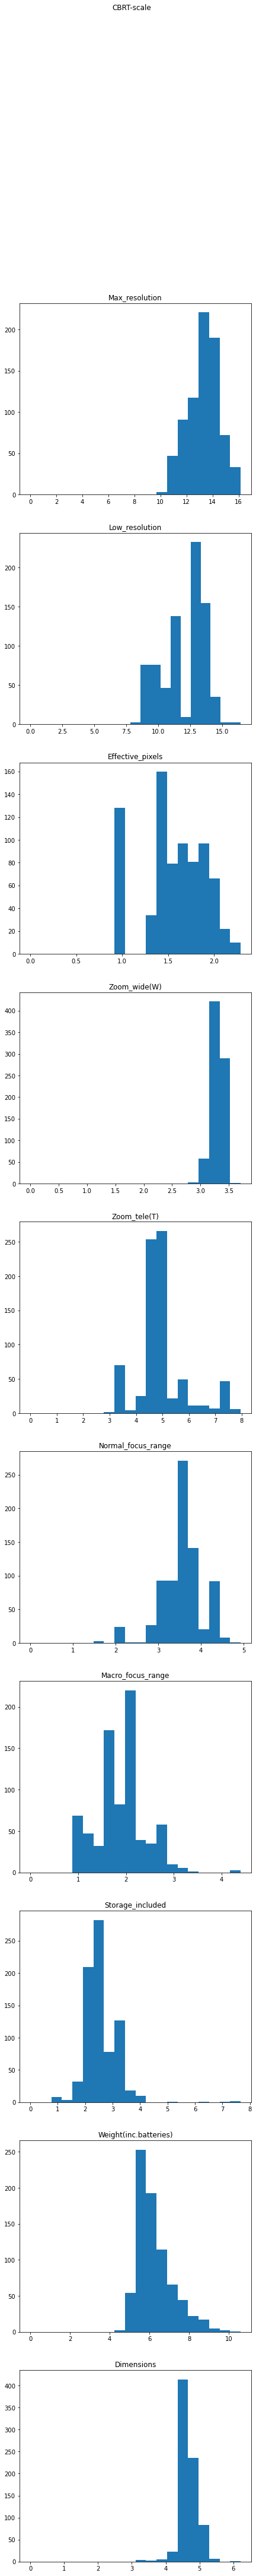

In [22]:
c=[ 'Max_resolution', 'Low_resolution', 'Effective_pixels',
       'Zoom_wide(W)', 'Zoom_tele(T)', 'Normal_focus_range',
       'Macro_focus_range', 'Storage_included', 'Weight(inc.batteries)',
       'Dimensions']
i=1
plt.figure(figsize=[7,70])
for x in c :
    u=np.cbrt(df[x].max())/20
    bins=np.arange(0,np.cbrt(df[x].max())+u,u)
    plt.subplot(len(c),1,i);
    plt.hist(np.cbrt(df[x]),bins=bins);
    plt.title(x);
    i +=1
plt.suptitle('CBRT-scale')

### Price Correlation heatmap with CBRT scaled features

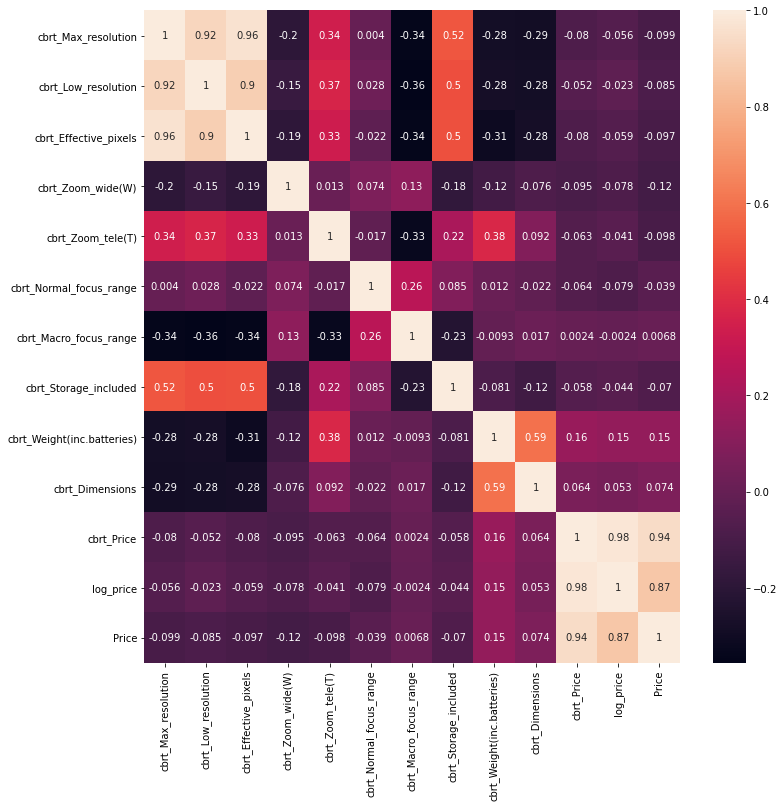

In [23]:
cbrt=pd.DataFrame()
for x in norm:
    v="cbrt_{}".format(x)
    cbrt[v]=np.cbrt(norm[x])
cbrt[['log_price','Price']]=df[['log_price','Price']]
cbrt=cbrt.drop(['cbrt_log_price'],axis=1)
plt.figure(figsize=[12,12]);
sb.heatmap(cbrt.corr(),annot=True);


### Square-Scale

Text(0.5, 0.98, 'Square-scale')

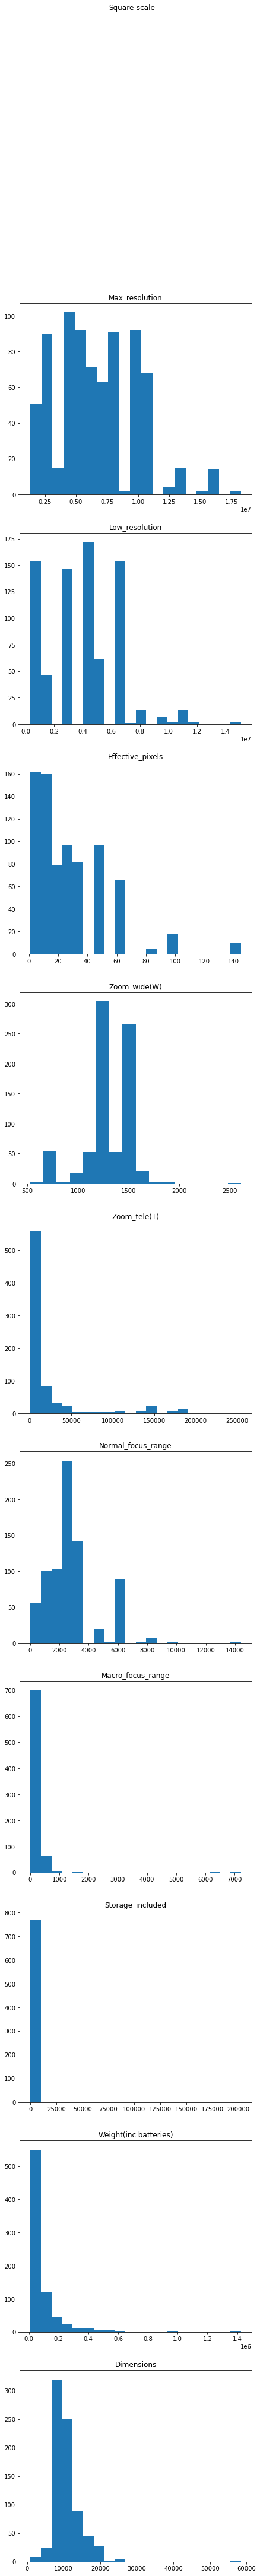

In [24]:
c=[ 'Max_resolution', 'Low_resolution', 'Effective_pixels',
       'Zoom_wide(W)', 'Zoom_tele(T)', 'Normal_focus_range',
       'Macro_focus_range', 'Storage_included', 'Weight(inc.batteries)',
       'Dimensions']
i=1
plt.figure(figsize=[7,70])
for x in c :
    u=(df[x].max()**2)/20
    bins=np.arange((df[x].min()**2),(df[x].max()**2)+u,u)
    plt.subplot(len(c),1,i);
    plt.hist((df[x]**2),bins=bins);
    plt.title(x);
    i +=1
plt.suptitle('Square-scale')

### Price Correlation heatmap with Square scaled features

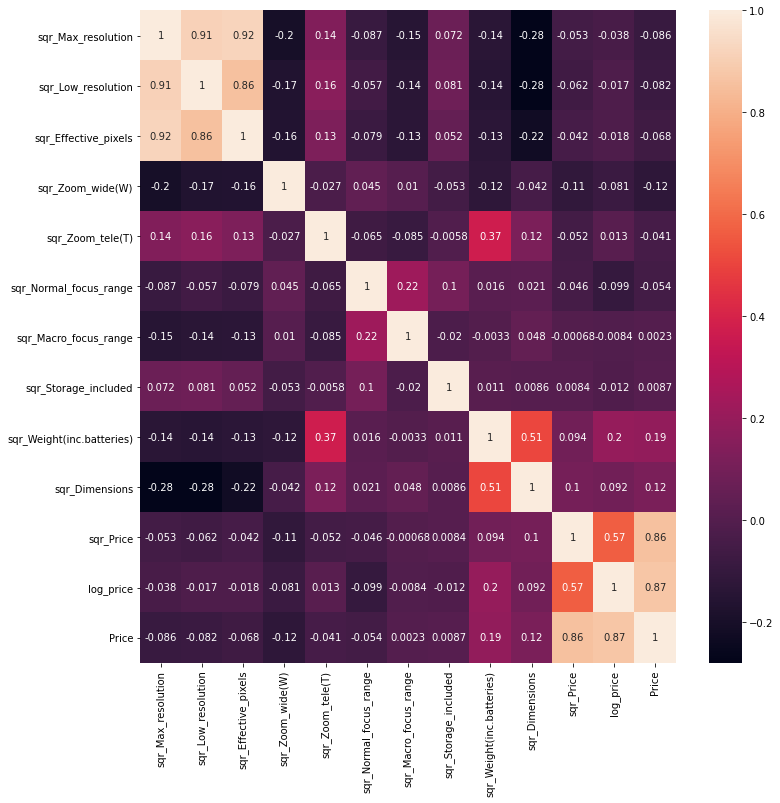

In [25]:
square=pd.DataFrame()
for x in norm:
    v="sqr_{}".format(x)
    square[v]=norm[x]**2
square[['log_price','Price']]=df[['log_price','Price']]
square=square.drop(['sqr_log_price'],axis=1)
plt.figure(figsize=[12,12]);
sb.heatmap(square.corr(),annot=True);


### Aggregating transformed scaled features with normal feature to have a better look

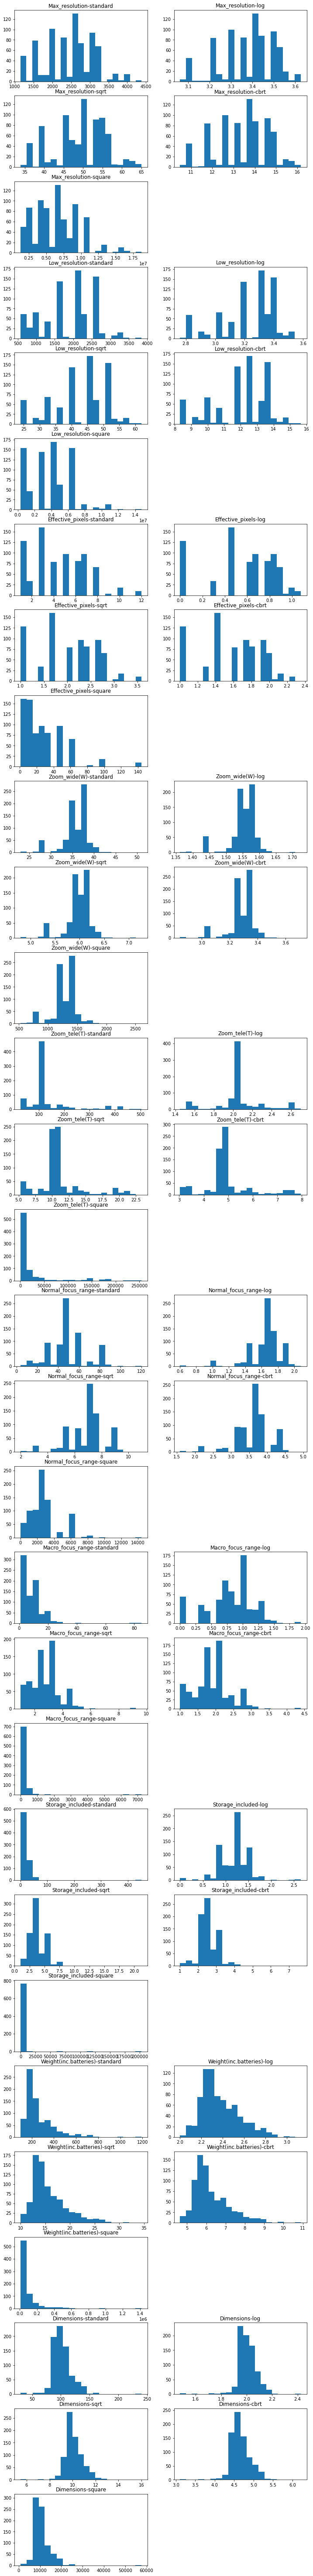

In [26]:
c=[ 'Max_resolution', 'Low_resolution', 'Effective_pixels',
       'Zoom_wide(W)', 'Zoom_tele(T)', 'Normal_focus_range',
       'Macro_focus_range', 'Storage_included', 'Weight(inc.batteries)',
       'Dimensions']
i=1
plt.figure(figsize=[12,180])
for x in c :
    u=((df[x].max())-(df[x].min()))/20
    bins=np.arange((df[x].min()),(df[x].max())+u,u)
    plt.subplot(5*len(c),2,i);
    plt.hist((df[x]),bins=bins);
    plt.title(x+'-standard');
    
    
    u=(np.log10(df[x].max())-np.log10(df[x].min()))/20
    bins=np.arange(np.log10(df[x].min()),np.log10(df[x].max())+u,u)
    plt.subplot(5*len(c),2,i+1);
    plt.hist(np.log10(df[x]),bins=bins);
    plt.title(x+'-log');

    u=(np.sqrt(df[x].max())-np.sqrt(df[x].min()))/20
    bins=np.arange(np.sqrt(df[x].min()),np.sqrt(df[x].max())+u,u)
    plt.subplot(5*len(c),2,i+2);
    plt.hist(np.sqrt(df[x]),bins=bins);
    plt.title(x+'-sqrt');
    
    
    u=(np.cbrt(df[x].max())-np.cbrt(df[x].min()))/20
    bins=np.arange(np.cbrt(df[x].min()),np.cbrt(df[x].max())+u,u)
    plt.subplot(5*len(c),2,i+3);
    plt.hist(np.cbrt(df[x]),bins=bins);
    plt.title(x+'-cbrt');
    
    
    u=((df[x].max()**2)-(df[x].min()**2))/20
    bins=np.arange(df[x].min()**2,(df[x].max()**2)+u,u)
    plt.subplot(5*len(c),2,i+4);
    plt.hist((df[x]**2),bins=bins);
    plt.title(x+'-square');
    i +=6
    

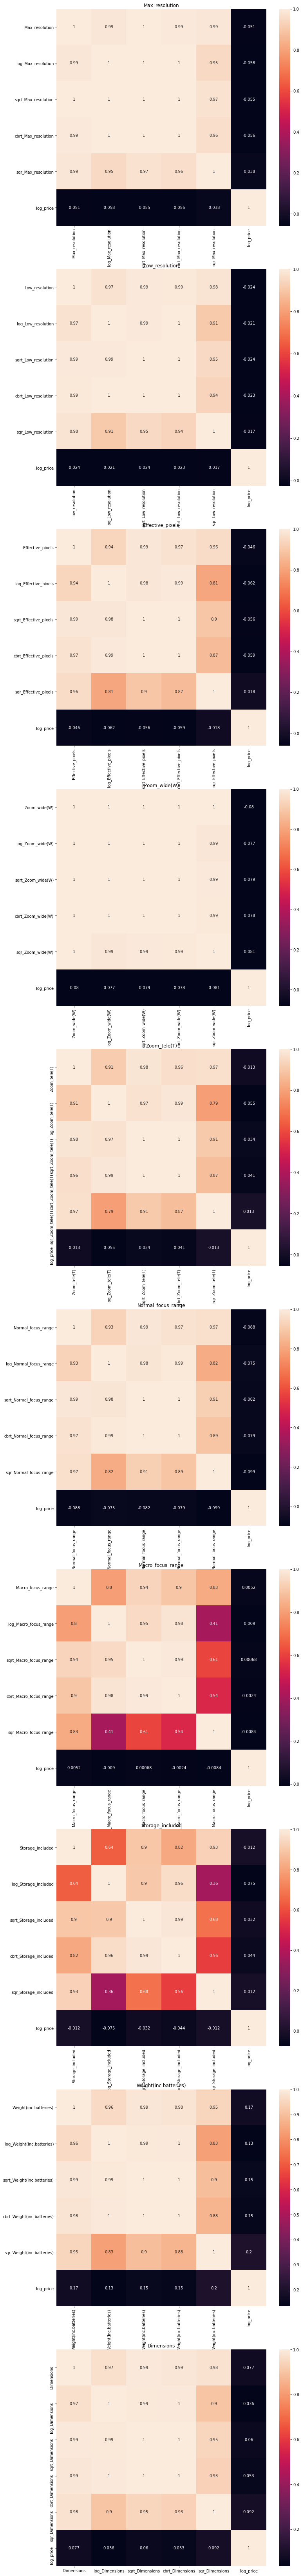

In [27]:
c=[ 'Max_resolution', 'Low_resolution', 'Effective_pixels',
       'Zoom_wide(W)', 'Zoom_tele(T)', 'Normal_focus_range',
       'Macro_focus_range', 'Storage_included', 'Weight(inc.batteries)',
       'Dimensions']
i=1
plt.figure(figsize=[12,120]);
for t in c :
    g=pd.DataFrame()
    g[t]=df[t]
    g['log_'+t]=np.log10(df[t])
    g['sqrt_'+t]=np.sqrt(df[t])
    g['cbrt_'+t]=np.cbrt(df[t])
    g['sqr_'+t]=df[t]**2
    g['log_price']=df['log_price']
    plt.subplot(len(c),1,i);
    sb.heatmap(g.corr(),annot=True);
    plt.title(t);
    i+=1


In [28]:
df.describe()

Release_date  Max_resolution  Low_resolution  Effective_pixels  \
count    774.000000      774.000000      774.000000        774.000000   
mean    2003.782946     2470.156331     1857.387597          4.529716   
std        2.514006      648.166172      677.246094          2.535343   
min     1998.000000     1152.000000      576.000000          1.000000   
25%     2002.000000     2048.000000     1280.000000          3.000000   
50%     2004.000000     2560.000000     2048.000000          4.000000   
75%     2006.000000     3072.000000     2498.250000          7.000000   
max     2007.000000     4224.000000     3840.000000         12.000000   

       Zoom_wide(W)  Zoom_tele(T)  Normal_focus_range  Macro_focus_range  \
count    774.000000    774.000000          774.000000         774.000000   
mean      35.835917    134.337209           50.122739           8.541344   
std        2.992911     88.356527           17.489281           7.523673   
min       23.000000     28.000000            4.000000           1.000000   
25%       35.000000    105.000000           40.000000           4.000000   
50%       36.000000    112.000000           50.000000           7.000000   
75%       38.000000    117.000000           60.000000          10.000000   
max       51.000000    504.000000          120.000000          85.000000   

       Storage_included  Weight(inc.batteries)  Dimensions        Price  \
count        773.000000             773.000000  773.000000   774.000000   
mean          20.107374             261.485123  102.023933   356.281654   
std           28.720560             132.738821   17.093495   460.725123   
min            1.000000             100.000000   30.000000    14.000000   
25%            9.000000             178.000000   91.000000   149.000000   
50%           16.000000             215.000000   99.000000   199.000000   
75%           24.000000             315.000000  110.000000   384.000000   
max          450.000000            1190.000000  240.000000  4999.000000   

        log_price  sqrt_price  cbrt_price  
count  774.000000  774.000000  774.000000  
mean     2.388011   16.967005    6.472031  
std      0.326347    8.275921    1.915950  
min      1.146128    3.741657    2.410142  
25%      2.173186   12.206556    5.301459  
50%      2.298853   14.106736    5.838272  
75%      2.584331   19.595918    7.268482  
max      3.698883   70.703607   17.098619

##### From previous investigation using transformations, data description and correlation heatmaps we found that mainly correlation is low between price and other categorical features but best transformations as follow:
- 'Max_resolution' , 'Low_resolution' , 'Storage_included' , 'Weight(inc.batteries)' : will follow log-scale transformation
- 'Zoom_wide(W)' ,'Normal_focus_range' , 'Macro_focus_range' , 'Dimensions' : will follow sqrt-scale transformation
- 'Zoom_tele(T)' :  will follow cbrt-scale transformation
- 'Effective_pixels' : discrete data will remain the same.

In [29]:
df[['log_Max_resolution' , 'log_Low_resolution' , 'log_Storage_included' , 'log_Weight(inc.batteries)']]=np.log10(df[['Max_resolution' , 'Low_resolution' , 'Storage_included' , 'Weight(inc.batteries)']])

In [30]:
df[['sqrt_Effective_pixels' , 'sqrt_Zoom_wide(W)' ,'sqrt_Normal_focus_range' , 'sqrt_Macro_focus_range' , 'sqrt_Dimensions']]=np.sqrt(df[['Effective_pixels' , 'Zoom_wide(W)' ,'Normal_focus_range' , 'Macro_focus_range' , 'Dimensions']])

In [31]:
df['cbrt_Zoom_tele(T)']=np.cbrt(df['Zoom_tele(T)'])

In [32]:
df1=df.iloc[:,0:15]
df2=df[['Price','log_price','Release_date','supplier_name','device_name','log_Max_resolution' , 'log_Low_resolution' , 'log_Storage_included' , 'log_Weight(inc.batteries)','sqrt_Effective_pixels' , 'sqrt_Zoom_wide(W)' ,'sqrt_Normal_focus_range' , 'sqrt_Macro_focus_range' , 'sqrt_Dimensions','cbrt_Zoom_tele(T)']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 5 to 1037
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      774 non-null    float64
 1   log_price                  774 non-null    float64
 2   Release_date               774 non-null    int64  
 3   supplier_name              774 non-null    object 
 4   device_name                774 non-null    object 
 5   log_Max_resolution         774 non-null    float64
 6   log_Low_resolution         774 non-null    float64
 7   log_Storage_included       773 non-null    float64
 8   log_Weight(inc.batteries)  773 non-null    float64
 9   sqrt_Effective_pixels      774 non-null    float64
 10  sqrt_Zoom_wide(W)          774 non-null    float64
 11  sqrt_Normal_focus_range    774 non-null    float64
 12  sqrt_Macro_focus_range     774 non-null    float64
 13  sqrt_Dimensions            773 non-null    float6

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 5 to 1037
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release_date           774 non-null    int64  
 1   Max_resolution         774 non-null    float64
 2   Low_resolution         774 non-null    float64
 3   Effective_pixels       774 non-null    float64
 4   Zoom_wide(W)           774 non-null    float64
 5   Zoom_tele(T)           774 non-null    float64
 6   Normal_focus_range     774 non-null    float64
 7   Macro_focus_range      774 non-null    float64
 8   Storage_included       773 non-null    float64
 9   Weight(inc.batteries)  773 non-null    float64
 10  Dimensions             773 non-null    float64
 11  Price                  774 non-null    float64
 12  supplier_name          774 non-null    object 
 13  device_name            774 non-null    object 
 14  log_price              774 non-null    float64
dtypes: fl

In [34]:
df1.describe()

Release_date  Max_resolution  Low_resolution  Effective_pixels  \
count    774.000000      774.000000      774.000000        774.000000   
mean    2003.782946     2470.156331     1857.387597          4.529716   
std        2.514006      648.166172      677.246094          2.535343   
min     1998.000000     1152.000000      576.000000          1.000000   
25%     2002.000000     2048.000000     1280.000000          3.000000   
50%     2004.000000     2560.000000     2048.000000          4.000000   
75%     2006.000000     3072.000000     2498.250000          7.000000   
max     2007.000000     4224.000000     3840.000000         12.000000   

       Zoom_wide(W)  Zoom_tele(T)  Normal_focus_range  Macro_focus_range  \
count    774.000000    774.000000          774.000000         774.000000   
mean      35.835917    134.337209           50.122739           8.541344   
std        2.992911     88.356527           17.489281           7.523673   
min       23.000000     28.000000            4.000000           1.000000   
25%       35.000000    105.000000           40.000000           4.000000   
50%       36.000000    112.000000           50.000000           7.000000   
75%       38.000000    117.000000           60.000000          10.000000   
max       51.000000    504.000000          120.000000          85.000000   

       Storage_included  Weight(inc.batteries)  Dimensions        Price  \
count        773.000000             773.000000  773.000000   774.000000   
mean          20.107374             261.485123  102.023933   356.281654   
std           28.720560             132.738821   17.093495   460.725123   
min            1.000000             100.000000   30.000000    14.000000   
25%            9.000000             178.000000   91.000000   149.000000   
50%           16.000000             215.000000   99.000000   199.000000   
75%           24.000000             315.000000  110.000000   384.000000   
max          450.000000            1190.000000  240.000000  4999.000000   

        log_price  
count  774.000000  
mean     2.388011  
std      0.326347  
min      1.146128  
25%      2.173186  
50%      2.298853  
75%      2.584331  
max      3.698883

In [35]:
maxx=[1152,1500,2000,2500,3000,3500,4224]
low=[576,700,1000,1500,2000,2500,3000,3800]
eff=[1,3,6,9,12]
wide=[23,30,32,35,38,40,50]
weigh=[100,200,300,450,700,1190]
tele=[28,50,80,120,150,200,280,400,500]
norm=[4,25,40,50,60,80,120]
macro=[1,5,10,20,30,60,85]
stor=[1,5,10,20,30,50,100,450]
dim=[30,60,90,120,150,180,240]

### Now let's check univariates more precisely :
> > Question: What are the properties of each cameras feature distribution?

### Price distribution :
###### Q: How would most cameras prices range be? and how much cameras offered in high price ? 

In [36]:
df['log_price']=np.log10(df.Price)

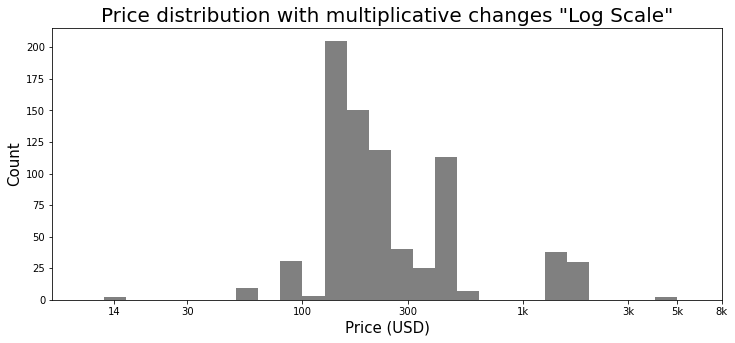

In [37]:
plt.figure(figsize=[12,5]);
bins=np.arange(1,df.log_price.max()+.1,.1)
plt.hist(df.log_price,bins=bins,color='grey')
a=np.log10([14,30,100,300,1000,3000,5000,8000])
c=['14','30','100','300','1k','3k','5k','8k']
plt.xticks(a,c);
plt.title('Price distribution with multiplicative changes "Log Scale"',size=20);
plt.xlabel('Price (USD)',size=15);
plt.ylabel('Count',size=15);

###### Observation:  
 > We notice that cameras price is mainly peaked inbetween (100:600)USD while having some outliers inbetween (1500:2000)USD with high outliers of few cameras around (5000)USD . '

In [38]:
df2['Effective_pixels']=df1['Effective_pixels']

<ipython-input-38-c6c84ac3f528>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Effective_pixels']=df1['Effective_pixels']


In [39]:
def distt(x,ticks,scale='standard'):
    plt.figure(figsize=[15,6]);
    if scale != 'standard' :
        var=str(scale)+'_'+str(x)
    else :
        var=str(x)
    u1=(df2[var].max()-df2[var].min())/20
    bins1=np.arange(df2[var].min(),df2[var].max()+u1,u1)
    plt.hist(df2[var],bins=bins1,color='grey');
    if scale == 'log' :
        c=np.log10(ticks)
        a=['{}'.format(t) for t in ticks]
        plt.xticks(c,a);
    elif scale == 'sqrt' :
        c=np.sqrt(ticks)
        a=['{}'.format(t) for t in ticks]
        plt.xticks(c,a);
    elif scale == 'cbrt' :
        c=np.cbrt(ticks)
        a=['{}'.format(t) for t in ticks]
        plt.xticks(c,a);
    else:
        pass
    plt.title(str(x)+' '+scale.upper()+' - scaled',size=20);
    plt.ylabel('Count',size=15);

##### Max-resolution distribution :
> > Q:What is the range of cameras Max-resolution offered in this dataset and where most cameras lies ? 

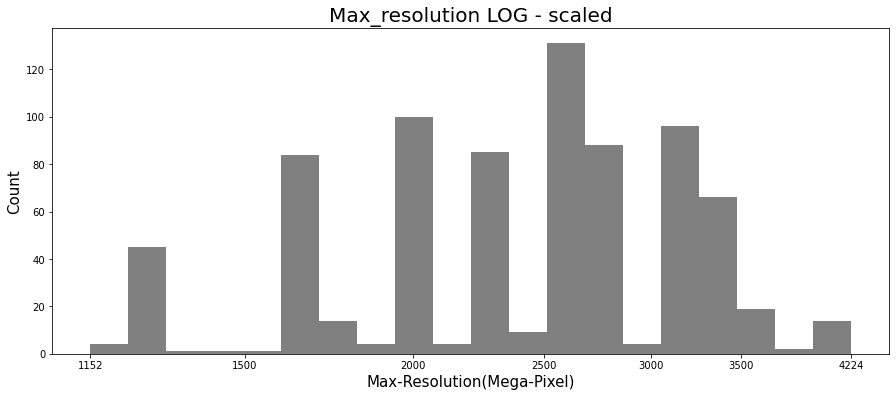

In [40]:
distt(x='Max_resolution',ticks=maxx,scale='log')
plt.xlabel('Max-Resolution(Mega-Pixel)',size=15);

###### Observation:  
> We can notice from the graph that max resolution range is inbetween (1152:4224). While, mainly peaks every around '250' megapixels interval inbetween(1250:3250) mega pixels with highest peak around 2.5 giga pixels .

##### Low-resolution distribution :
> > Q:What is the range of cameras low-resolution offered in this dataset and where most cameras lies ? 

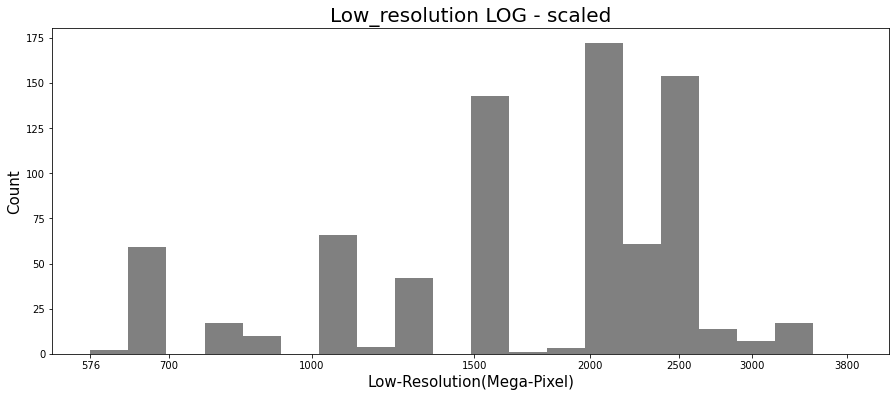

In [41]:
distt(x='Low_resolution',ticks=low,scale='log')
plt.xlabel('Low-Resolution(Mega-Pixel)',size=15);

###### Observation: 

> we can observe that low resolution has highest peaks around 1.5, 2 and 2.5 giga pixels with highest value at 2 giga pixels and total range of (576:3840)mega-pixels.


##### Storage distribution :

> > Q:What is the range of cameras storages offered in this dataset and where most cameras lies ? 

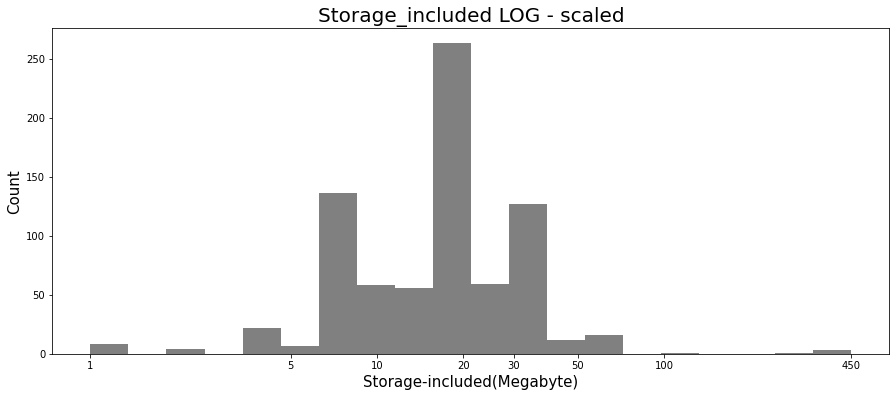

In [42]:
distt(x='Storage_included',ticks=stor,scale='log')
plt.xlabel('Storage-included(Megabyte)',size=15);

###### Observation: 

> we can observe that most of storage data lies between (5:50) with maximum peak around '20' while '>100' or '<5' are outliers and has overall range of (1:450) mega-bytes .

##### Weight(inc.batteries) distribution :

> > Q:How is cameras Weight of inc.batteries distribution looks? 



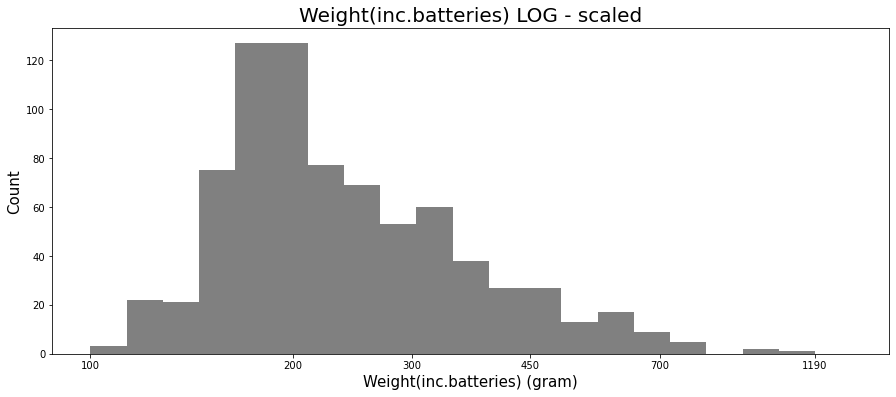

In [43]:
distt(x='Weight(inc.batteries)',ticks=weigh,scale='log')
plt.xlabel('Weight(inc.batteries) (gram)',size=15);


###### Observation:  
> We can observe that most camera inc batteries weight lies inbetween (100:700) with highest peak of weight '200' while more than '750' could be considered outliers.


##### Effective_pixels distribution :
> > Q:What is the range of cameras Effective-pixels offered in this dataset and where most cameras lies ? 


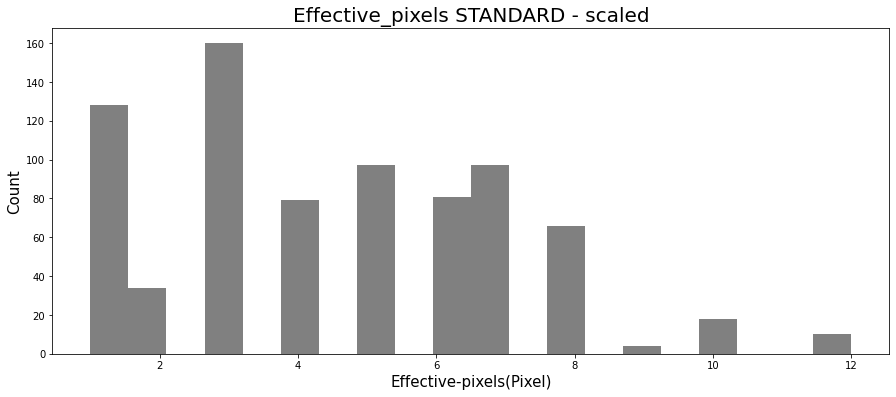

In [44]:
distt(x='Effective_pixels',ticks='')
plt.xlabel('Effective-pixels(Pixel)',size=15);

###### Observation:

> Effective-pixels looks like more discrete with highest peaks around 3 pixels and 1 pixel which doesn't make sense but i think these low pixels values might be related to old cameras, whole Effective-pixels range of (1:12)pixels.

In [45]:
df.Effective_pixels.unique()

array([ 1.,  3.,  4.,  5.,  6.,  7.,  8., 10., 12.,  2.,  9.])

##### Normal_focus_range distribution :

> > Q:What is the range of cameras' lens Normal-focus-range offered in this dataset and where most cameras lies ? 


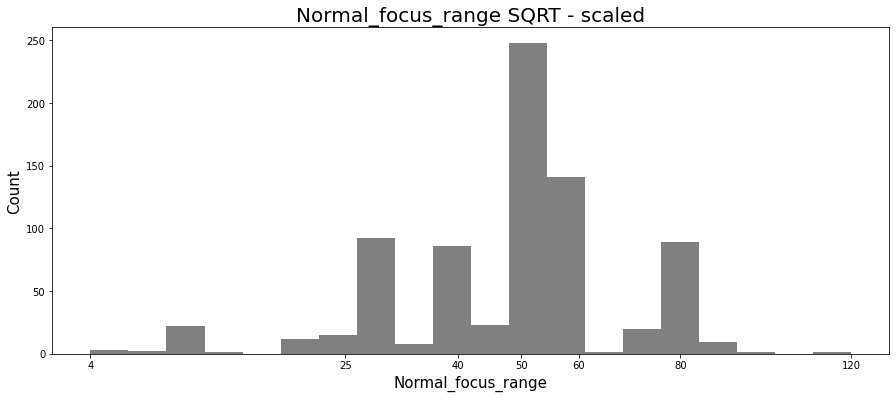

In [46]:
distt(x='Normal_focus_range',ticks=norm,scale='sqrt')
plt.xlabel('Normal_focus_range',size=15);


###### Observation:
> Looks that most Normal_focus_range lies inbetween (20 : 90) with highest peak of '50' and with low and high outliers with overall range of (4 : 120).

##### Macro_focus_range distribution :

> > Q:What is the range of cameras Macro_focus_range offered in this dataset and where most cameras lies ? 


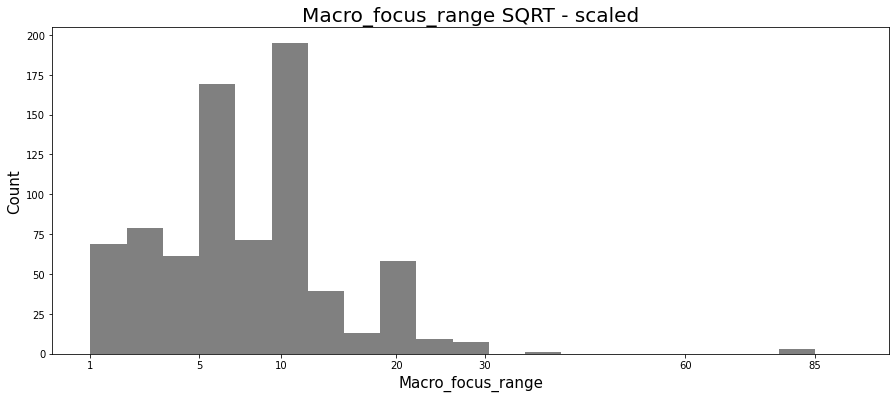

In [47]:
distt(x='Macro_focus_range',ticks=macro,scale='sqrt')
plt.xlabel('Macro_focus_range',size=15);


###### Observation:  

> It's clear that Most Macro_focus_range data is inbetween(0:20) with highest peaks at '10' and '5' respectively with outliers higher than '30' with overall (1:85). 

##### Dimensions distribution :
> > Q:How is the distribution of cameras sizes ('Dimensions') offered in this dataset and where most cameras lies ? 


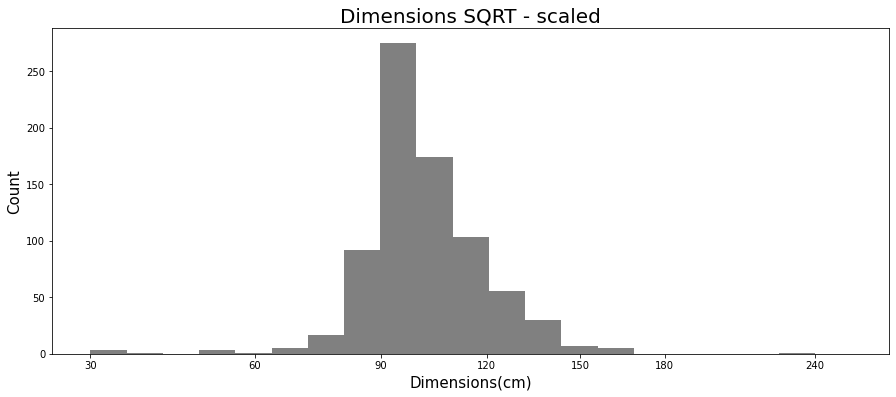

In [48]:
distt(x='Dimensions',ticks=dim,scale='sqrt')
plt.xlabel('Dimensions(cm)',size=15);


###### Observation: 


> Sounds clear that most of Dimensions lies inbetween (50:160)CMs with highest peak inbetween (90:100)CMs with high and low outliers

##### Zoom_wide(W) distribution :
> > Q:How is the distribution of cameras' lens Zoom_wide(W) offered in this dataset and where most cameras lies ? 




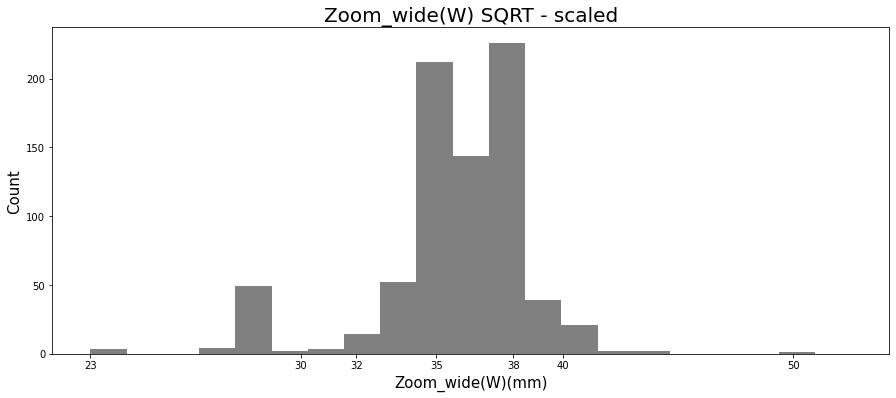

In [49]:
distt(x='Zoom_wide(W)',ticks=wide,scale='sqrt')
plt.xlabel('Zoom_wide(W)(mm)'  ,size=15);

###### Observation:  
- Most of cameras' lens zoom-width is between '32' mm to '40' mm with highest peaks at '38' mm and '35' mm respectively with '23', '50' mm high outliers .

##### Zoom_tele(T) distribution :
> > Q:How is the distribution of cameras' lens Zoom_tele(T) offered in this dataset and where most cameras lies ? 


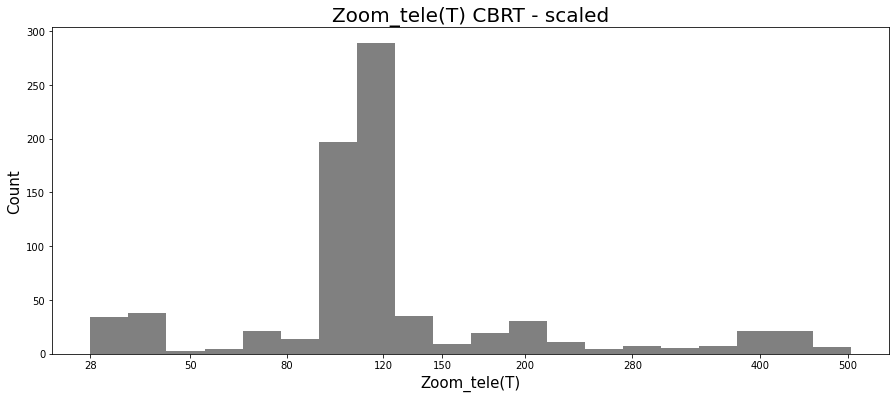

In [50]:
distt(x='Zoom_tele(T)',ticks=tele,scale='cbrt')
plt.xlabel('Zoom_tele(T)'  ,size=15);


###### Observation:  

> we noticed that cameras zoom tele is very high peaked inbetween (100:120) while all other values are at low frequency .

##### Supplier-Name distribution:

> >Q: Which manufacturer dominates highest market share for offered cameras ? 


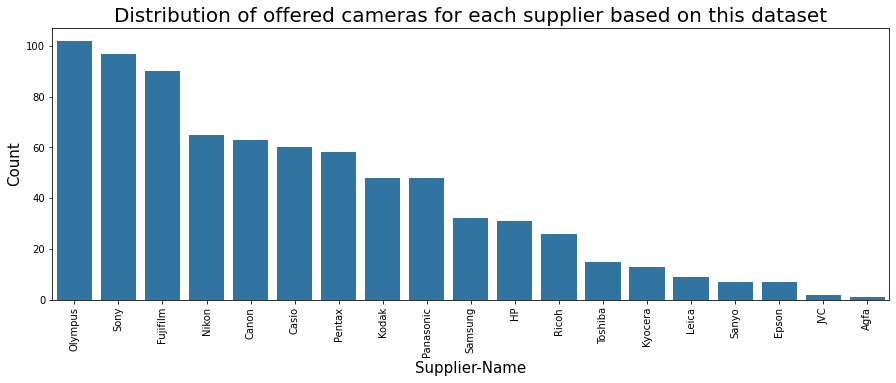

In [51]:
plt.figure(figsize=[15,5]);
order=df.supplier_name.value_counts().index
sb.countplot(data=df,x='supplier_name',order=order,color=sb.color_palette()[0]);
plt.xticks(rotation=90);
plt.title('Distribution of offered cameras for each supplier based on this dataset',size=20);
plt.xlabel('Supplier-Name' ,size=15);
plt.ylabel('Count',size=15);

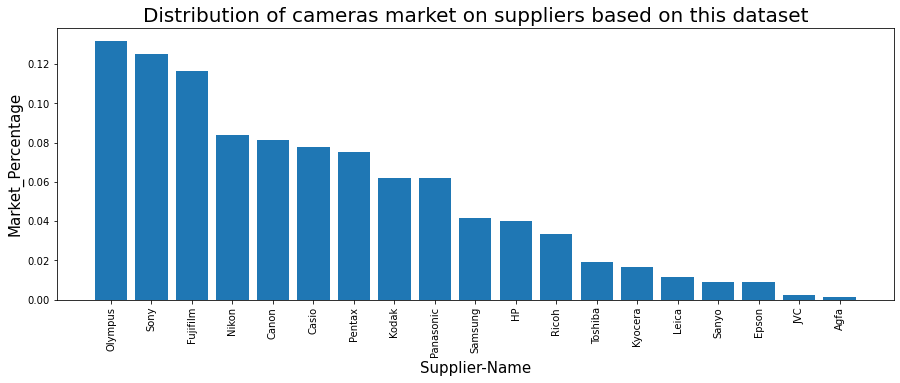

In [52]:
plt.figure(figsize=[15,5]);
c=df.supplier_name.value_counts()
c=c.reset_index(name='count')
c['Market_Percentage']=c['count']/c['count'].sum()
c['Supplier_name']=c['index']
plt.bar(data=c,x='Supplier_name',height='Market_Percentage');
plt.xticks(rotation=90);
plt.title('Distribution of cameras market on suppliers based on this dataset',size=20);
plt.xlabel('Supplier-Name' ,size=15);
plt.ylabel('Market_Percentage',size=15);


###### Observation:  

> As observed first ten suppliers till "Samsung" dominate 85.77% of market share based on this dataset, thus, they control cameras market prices. While, first three suppliers "Olympus, Sony, Fujifilm" dominate 37.39% of market share with highest share of Olympus with  percentage of 13.2 % .


##### Release-date distribution :

> > Q: How is the cameras distribution over release years? and, which year dominates highest market share for offered 
cameras?


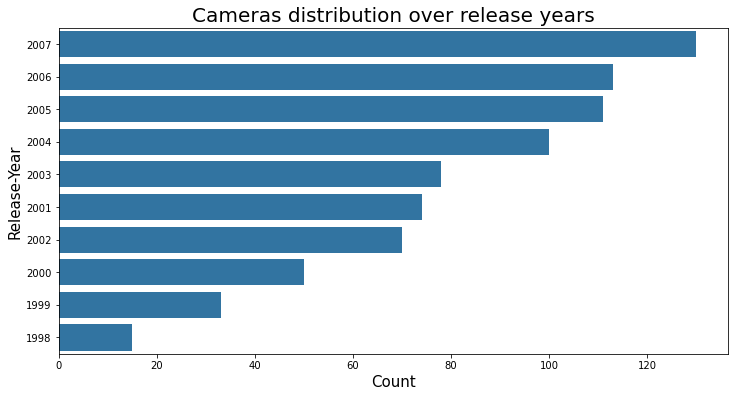

In [53]:
plt.figure(figsize=[12,6]);
order=df.Release_date.value_counts().index
sb.countplot(data=df,y='Release_date',order=order,color=sb.color_palette()[0]);
plt.title('Cameras distribution over release years',size=20);
plt.xlabel('Count'  ,size=15);
plt.ylabel('Release-Year',size=15);


###### Observation: 
> AS we can see cameras production rises gradually with time with lowest value in "1998" and peaked value in "2007" based on this dataset .

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We can summarize that cameras price data distribution has high aggregation inbetween (100:600)USD and a gap till next outliers inbetween(1500:2000)USD and extreme outliers of Panasonic and Olympus around (5000)USD .


> Our feature of interest which is price has right skewed distribution so it needed to be transformed and scaled to have it's distribution with multiplicative intervals rather than arithematic to look more normally, i have applied "Log-Scale" transformation .

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> We can summarize that cameras Technological features data distribution has high aggregation inbetween specific narrow ranges or discrete in nature with high outliers either with both high and low outliers .

> We can summarize that cameras suppliers and Release years are ordinal data with highest manufacturer record for 'Olympus' and with highest year count for "2007" and decreases gradually .

> For non discrete quantitative "Technological" features, distributions looked skewed and transformations is needed to see this distribution more normally based on multiplicative changes rather than arithmatic and to have more robust linear relationships if possible, with change in price since it's our feature of intereset and applied as follows :
-  'Max_resolution' , 'Low_resolution' , 'Storage_included' , 'Weight(inc.batteries)' : will follow log-scale transformation
-  'Zoom_wide(W)' ,'Normal_focus_range' , 'Macro_focus_range' , 'Dimensions' : will follow sqrt-scale transformation
-  'Zoom_tele(T)' : will follow cbrt-scale transformation.
-  'Effective_pixels' : discrete data will remain the same.

## Bivariate Exploration
> > Question : How correlated are the relationships between price and other features? and if correlated, in which direction?!

In [54]:
df2['Effective_pixels']=df1.Effective_pixels
df2.drop('sqrt_Effective_pixels',axis=1,inplace=True)

<ipython-input-54-de1ba6931ea0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Effective_pixels']=df1.Effective_pixels
C:\Users\ENG\anaconda3\envs\life_cycle\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:

df2.columns

Index(['Price', 'log_price', 'Release_date', 'supplier_name', 'device_name',
       'log_Max_resolution', 'log_Low_resolution', 'log_Storage_included',
       'log_Weight(inc.batteries)', 'sqrt_Zoom_wide(W)',
       'sqrt_Normal_focus_range', 'sqrt_Macro_focus_range', 'sqrt_Dimensions',
       'cbrt_Zoom_tele(T)', 'Effective_pixels'],
      dtype='object')

##### Preliminary general check using multiplotting techniques 
- From preliminary investigation we can outweigh that results might be disappointing and change in price might not be related to any of quantitive technological features.
- We also can assume strong relationships between max-resolution, low-resolution and between effective-pixels and each of them, also between weight(inc.batteries) and camera dimensions .  

C:\Users\ENG\anaconda3\envs\life_cycle\lib\site-packages\seaborn\axisgrid.py:132: UserWarning: The handle <matplotlib.patches.Patch object at 0x000001C7F5C74520> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


<Figure size 1080x2160 with 0 Axes>

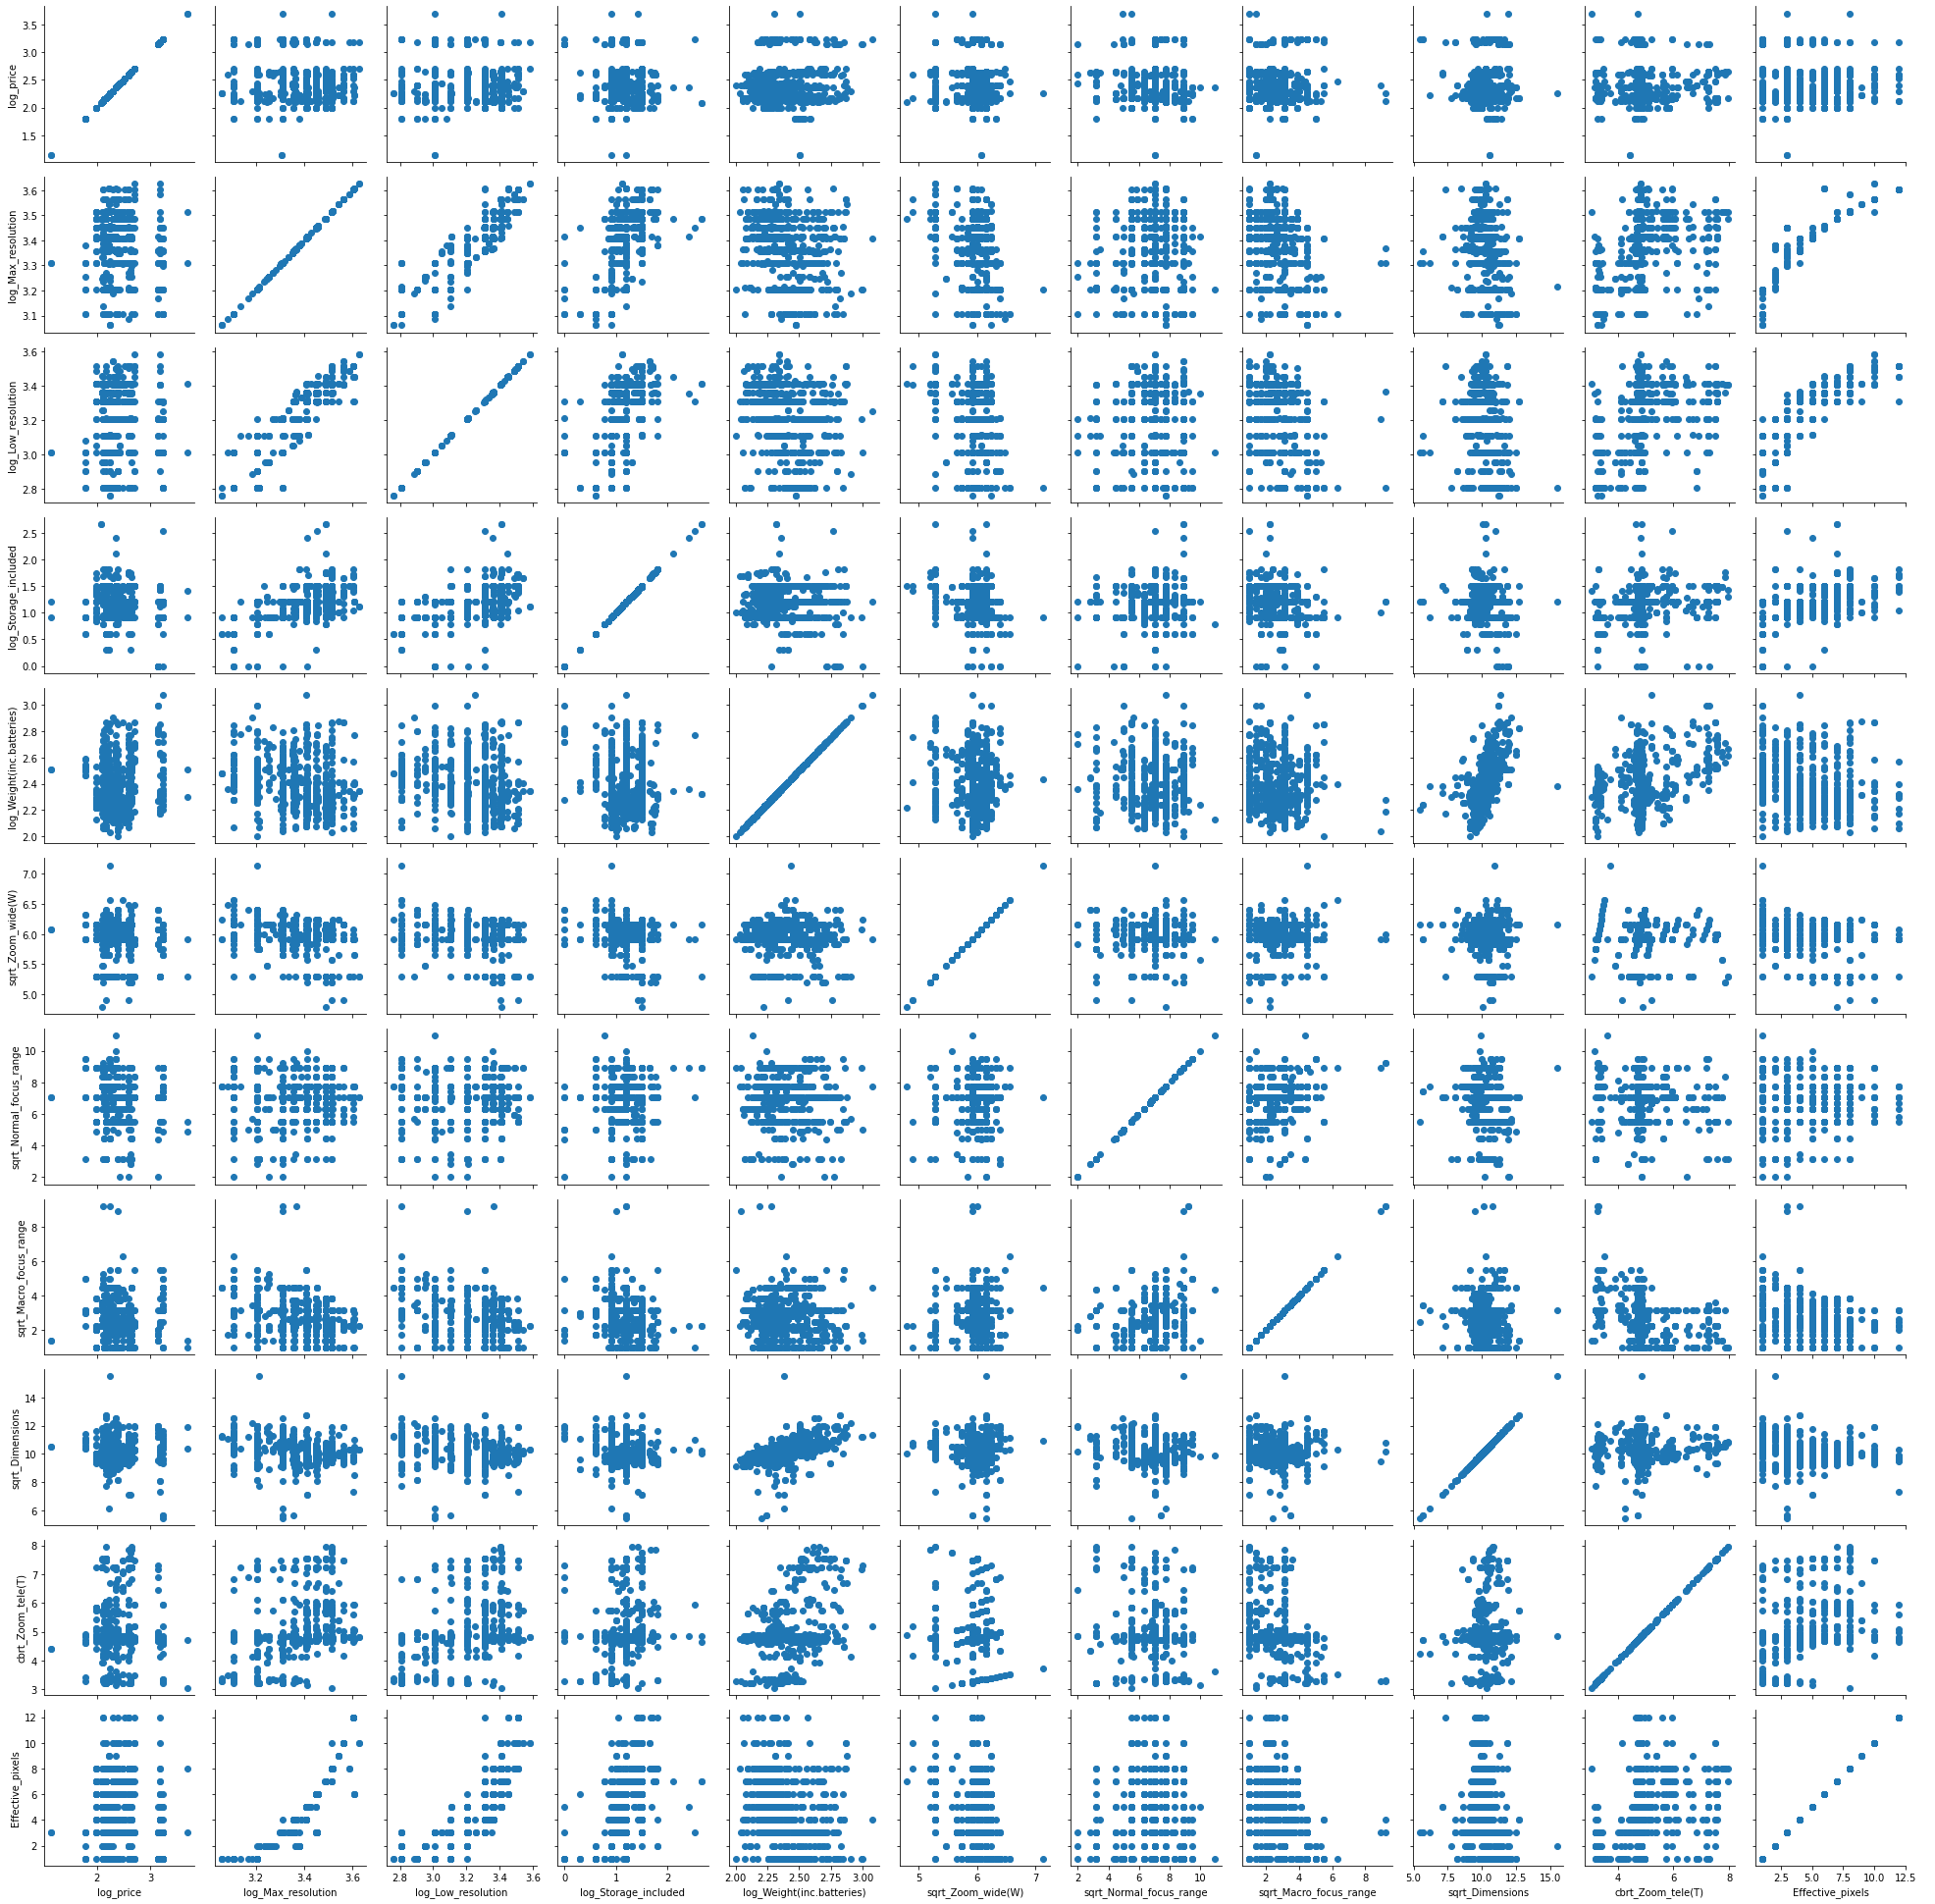

In [56]:
plt.figure(figsize=[15,30])
g=sb.PairGrid(data=df2,vars=['log_price',
       'log_Max_resolution', 'log_Low_resolution', 'log_Storage_included',
       'log_Weight(inc.batteries)', 'sqrt_Zoom_wide(W)',
       'sqrt_Normal_focus_range', 'sqrt_Macro_focus_range', 'sqrt_Dimensions',
       'cbrt_Zoom_tele(T)', 'Effective_pixels']);
g.map(plt.scatter);
g.add_legend();

In [57]:
def histt(x,ticks,scale='standard'):
    if scale != 'standard' :
        var=str(scale)+'_'+str(x)
    else :
        var=str(x)
    plt.figure(figsize=[12,7]);
    sb.regplot(data=df2,x=var,y='log_price',fit_reg=False,x_jitter=.3,scatter_kws={'alpha':1/3});
    if scale == 'log' :
        cc=np.log10(ticks)
        aa=['{}'.format(t) for t in ticks]
        plt.xticks(cc,aa);
    elif scale == 'sqrt' :
        cc=np.sqrt(ticks)
        aa=['{}'.format(t) for t in ticks]
        plt.xticks(cc,aa);
    elif scale == 'cbrt' :
        cc=np.cbrt(ticks)
        aa=['{}'.format(t) for t in ticks]
        plt.xticks(cc,aa);
    else:
        pass
    a=np.log10([14,30,100,300,600,1000,2000,3000,5000,8000])
    c=['14','30','100','300','600','1k','2k','3k','5k','8k']
    plt.title('Price VS {} - {} scaled'.format(x,scale),size=20);
    plt.yticks(a,c);
    plt.ylabel('Price(USD) (Log-scaled)'  ,size=15);

### Price VS Max-resolution

> > Q: Is change in price related to Cameras' max-resolution ?



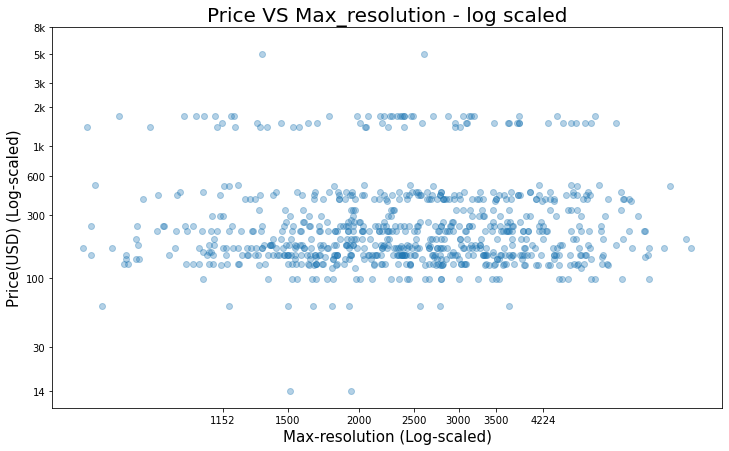

In [58]:
histt(x='Max_resolution',ticks=maxx,scale='log')
plt.xlabel('Max-resolution (Log-scaled)',size=15);

###### Observation:  

> From previous figure we can see that max-resolution tends to be more discrete resulting in unbiased relationship with price, so i think price doesn't rely on max-resolution that much.

> Also, we can notice that price for most max-resolution options to be inbetween(100:600)USD with some points lies between (1500:2000) and two outliers around (5000) exactly as we have analyzed price from histogram before.  

> But most overlapped max-resolution points within range (1250:3250) pixels . 

### Price VS Low-resolution

> > Q: Is change in price related to Cameras' Low-Resolution ?



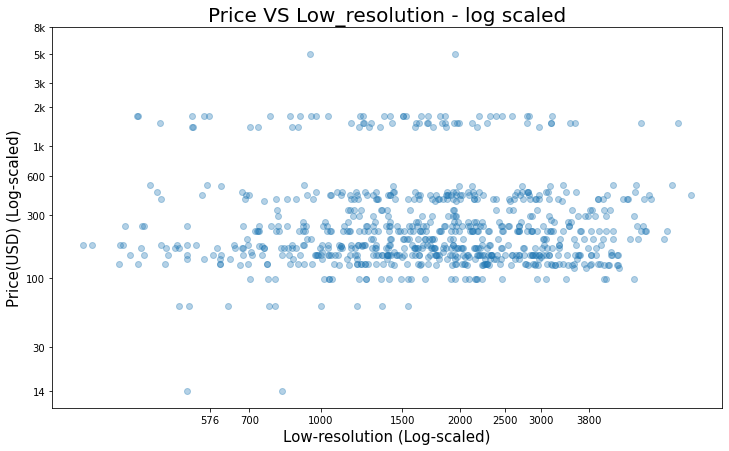

In [59]:
histt(x='Low_resolution',ticks=low,scale='log')
plt.xlabel('Low-resolution (Log-scaled)',size=15);

###### Observation:  

- As expected Low-resolution pattern highly lookslike max-resolution's in it's properties of tending to be more discrete and with almost constant relationship with price .
- Also, low-resolution looks overplotted at certain points (1000, 1500, 2000, 2500)pixels while price tends to have same properities as with max-resolution to be inbetween(100:600)USD with some points lies between (1500:2000)USD .
- That suggests that both max-resolution and low-resolution are related to each other what makes sense . 

### Max-resolution VS Low-resolution

> > Q:Is our intuition towards formerly discussed relationship between Max-Resolution and Low-Resolution sounds true? Let's have a look!

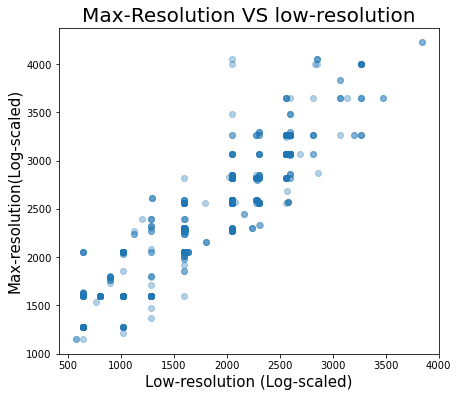

In [60]:
plt.figure(figsize=[15,6]);
plt.subplot(1,2,1);
sb.regplot(data=df1,x='Low_resolution',y='Max_resolution',fit_reg=False,x_jitter=.3,scatter_kws={'alpha':1/3});
plt.title('Max-Resolution VS low-resolution',size=20);
plt.ylabel('Max-resolution(Log-scaled)'  ,size=15);
plt.xlabel('Low-resolution (Log-scaled)',size=15);

###### Observation:  

> As expected Low_resolution, Max_resolution tends to be discrete and propotionally related .

### Price VS Storage-included


> > Q: Is change in price related to Cameras' storage options ?


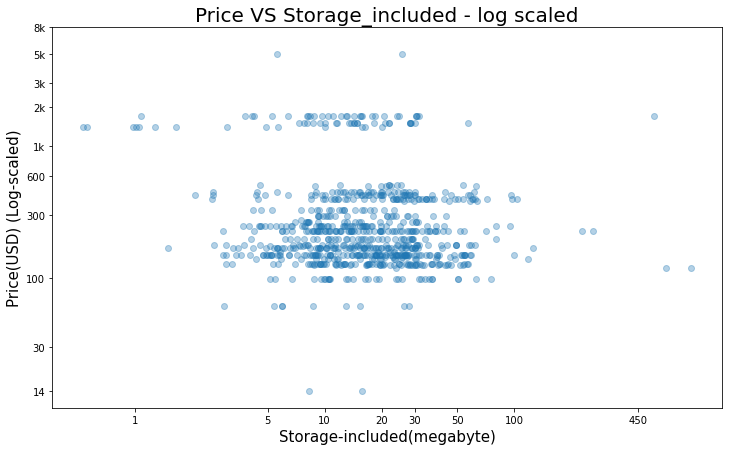

In [61]:
histt(x='Storage_included',ticks=stor,scale='log')
plt.xlabel('Storage-included(megabyte)',size=15);

###### Observation:  

- Disappointing results again as unexpected, i think price changing across storage change is something rational that hasn't happened here what suggests that there is another feature that distored expected price-storage relationship and i think it's supplier-name since different suppliers could offer same storage with different prices or in other words they might offer different storage options with for the same price .
- But mainly we have noticed that most cameras' storage mainly located inbetween(5:50) storage unit while price looks having the same attitude as before.


### Price VS Weight

> > Q: Is change in price related to Cameras' weights?


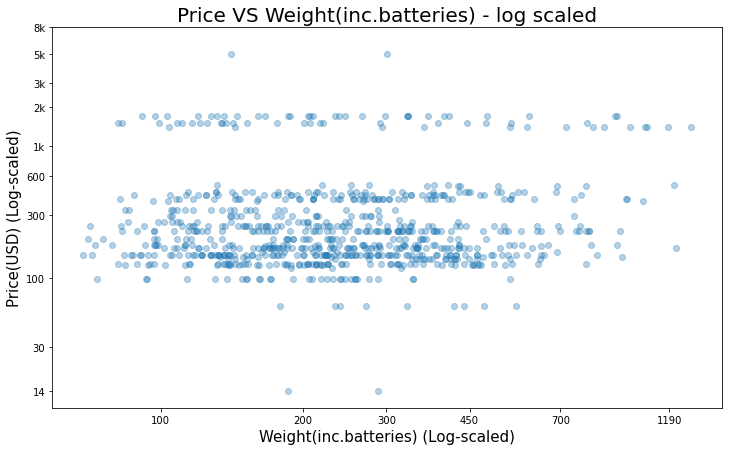

In [62]:
histt(x='Weight(inc.batteries)',ticks=weigh,scale='log')
plt.xlabel('Weight(inc.batteries) (Log-scaled)',size=15);

###### Observation:  

- Weight lookslike unrelated to price that much too, but this is not disappointing since we doesn't know if increase in battery weight shall affect battery life time or charge lasting period as a reason for price change or this weight is just a descriptive info has nothing to do with performance and price .
- Weight data looks mainly located inbetween(100:400)weight unit while have high outliers till around 1.2 (kg) while still in same price range, as expected.

### Price VS Zoom_wide(W)

> > Q: Is change in price related to Cameras lens Zoom_wide(W) as it may be an option for better camera shoots?


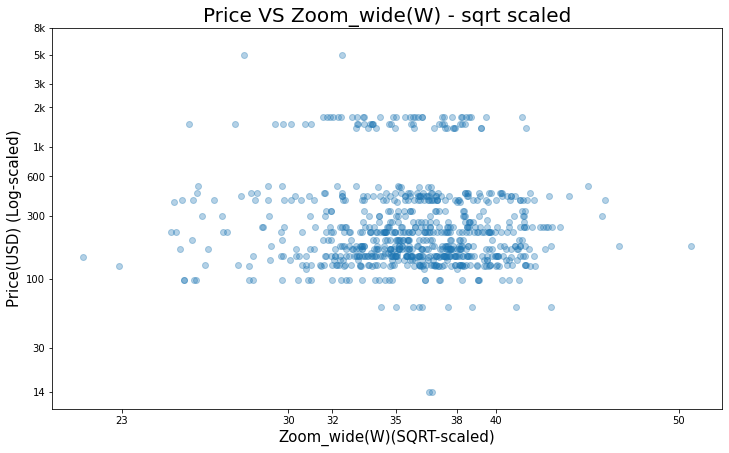

In [63]:
histt(x='Zoom_wide(W)',ticks=wide,scale='sqrt')
plt.xlabel('Zoom_wide(W)(SQRT-scaled)',size=15);


###### Observation:  

- As noticed from previous plot zoom-wide has low correlation and almost no relationship with price .
- Cameras zoom width looks mainly located inbetween(32:40)(mm) .

### Price VS Normal_focus_range

> > Q: Is change in price related to Cameras lens normal-focus-range as maybe some option is attracted by photographers what leads to change price as output of high demand?


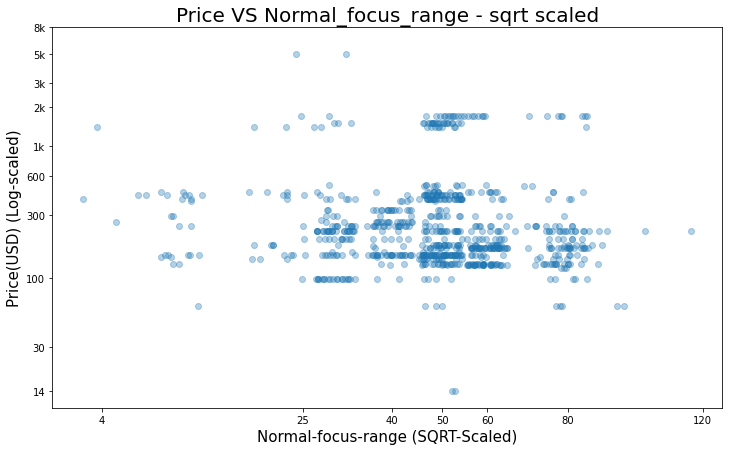

In [64]:
histt(x='Normal_focus_range',ticks=norm,scale='sqrt')
plt.xlabel('Normal-focus-range (SQRT-Scaled)',size=15);


###### Observation:  
- We can see that most of cameras normal focus range lies inbetween (30:80) with highest overplotting at (50), but for sure it has a very low correlation with price or in other words normal focus range is independent with respect to change in price.

### Price VS Macro_focus_range

###### Trying to figure the answer of the same question out with other technological features ?
> > Q: Is change in price related to Cameras Macro_focus_range ?


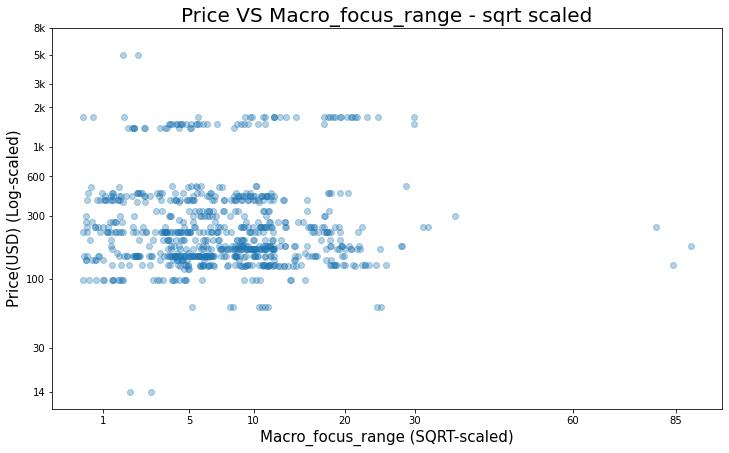

In [65]:
histt(x='Macro_focus_range',ticks=macro,scale='sqrt')
plt.xlabel('Macro_focus_range (SQRT-scaled)',size=15);


###### Observation:  

- Most cameras macro-focus-range data located inbetween(10:20) while other values higher than or equal (30) looks as outliers specially those three cameras with macro-focus-range around(80).
- Very clear that plot interpreting outlines that macro-focus-range is independent with respect to change in price .

### Price VS Dimensions

> > Q: Is change in price related to Cameras' sizes, as may people tend to prefer carriable sizes with same high properties waht leads to change in price based on high demand of specific sizes?


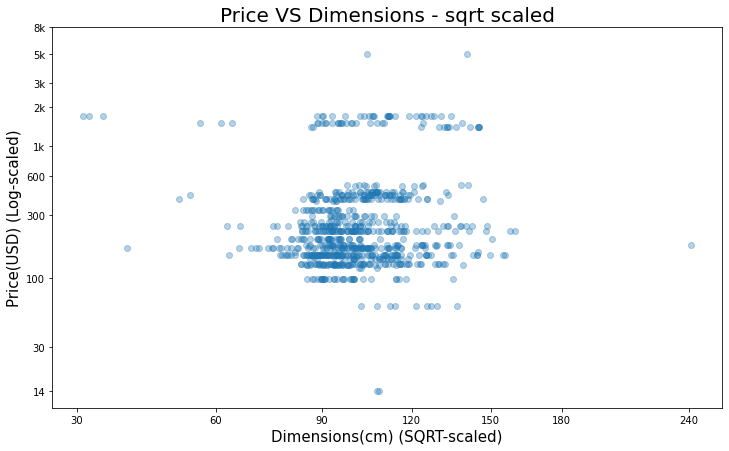

In [66]:
histt(x='Dimensions',ticks=dim,scale='sqrt')
plt.xlabel('Dimensions(cm) (SQRT-scaled)',size=15);


###### Observation:  

- Most of cameras dimensions lies inbetween(75:125) with low outliers around(30) and very high outlier around(240)
- Looks like cameras dimensions and sizes don't affect on cameras price .

### Price VS Zoom_tele(T)

###### Trying to figure the answer of the same question out with other technological features ?

> > Q: Is change in price related to Cameras' zoom-tele(T) options?


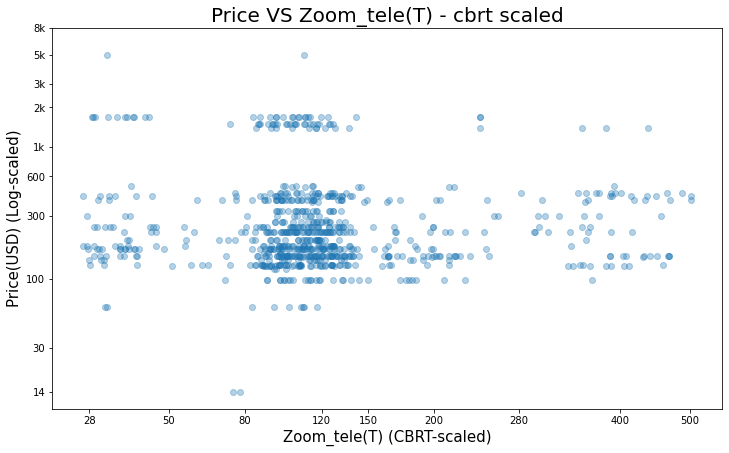

In [67]:
histt(x='Zoom_tele(T)',ticks=tele,scale='cbrt')
plt.xlabel('Zoom_tele(T) (CBRT-scaled)',size=15);


###### Observation:  


- Seems that cameras zoom tele are highly aggregated around one point of (100) with high outliers around (500)tele.
- Seems Zoom-tele is also independent variable for price change or in other words they are rarely correlated or related with each other.

### Price VS Effective-pixels

> > Q: Is change in price related to Cameras Effective-Pixels? Since, it has absolute desire to be in high options, so ite' rational to have impact on cameras' prices  


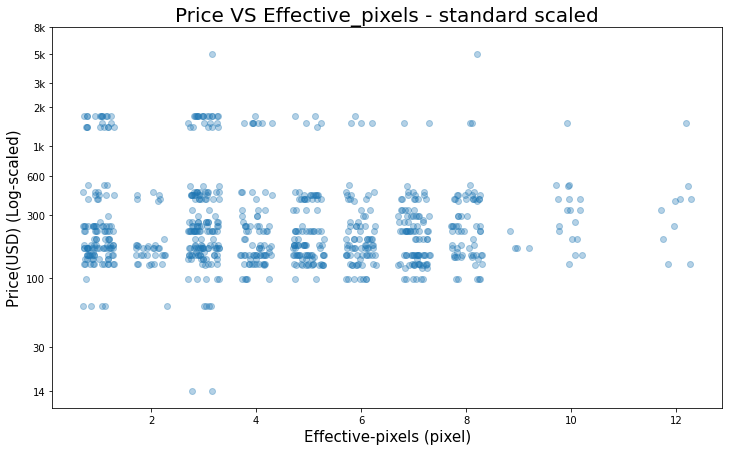

In [68]:
histt(x='Effective_pixels',ticks='')
plt.xlabel('Effective-pixels (pixel)',size=15);

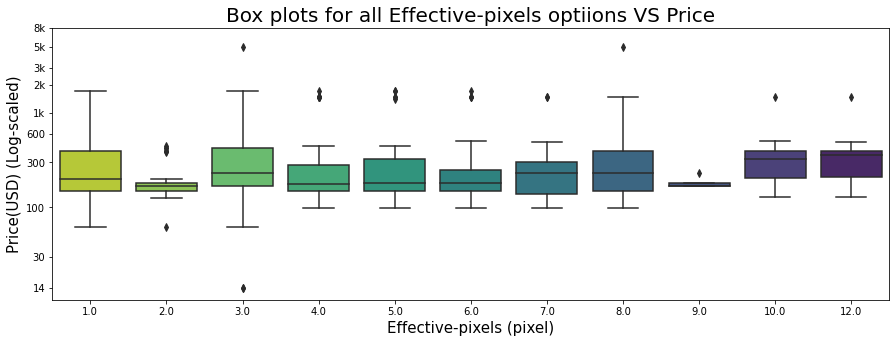

In [69]:
plt.figure(figsize=[15,5]);
sb.boxplot(data=df1,x='Effective_pixels',y='log_price',palette='viridis_r');
plt.title('Box plots for all Effective-pixels optiions VS Price',size=20);
a=np.log10([14,30,100,300,600,1000,2000,3000,5000,8000])
c=['14','30','100','300','600','1k','2k','3k','5k','8k']
plt.yticks(a,c);
plt.ylabel('Price(USD) (Log-scaled)'  ,size=15);
plt.xlabel('Effective-pixels (pixel)',size=15);


###### Observation:  

- From previous two plots we assure unexpected results, outlines that price has no change pattern regarding cameras effective pixels or in other words they are not correlated .

### Max-resolution VS Effective-pixels VS Low-resolution
- Since, high Effective-Pixels suggests better resolution, so what about to check this relation and figure this following question out ?

> > Q: When buying a camera, if we recorded high Effective-Pixels option, is that enough to assure high Low-Resolution and High-Resolution options?


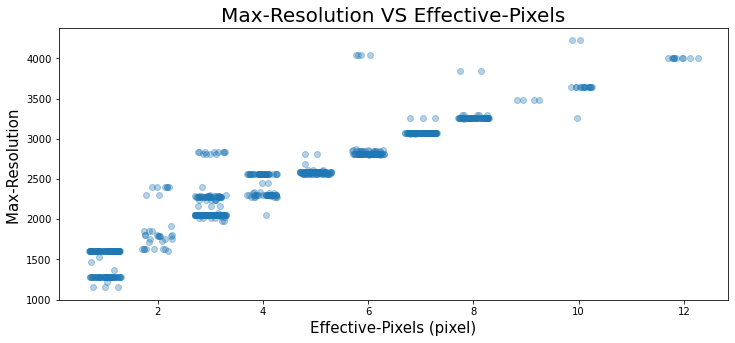

In [70]:
plt.figure(figsize=[12,5]);
sb.regplot(data=df1,y='Max_resolution',x='Effective_pixels',fit_reg=False,x_jitter=.3,scatter_kws={'alpha':1/3});
plt.title('Max-Resolution VS Effective-Pixels',size=20);
plt.ylabel('Max-Resolution '  ,size=15);
plt.xlabel('Effective-Pixels (pixel)' ,size=15);

### Low-resolution VS Effective-pixels

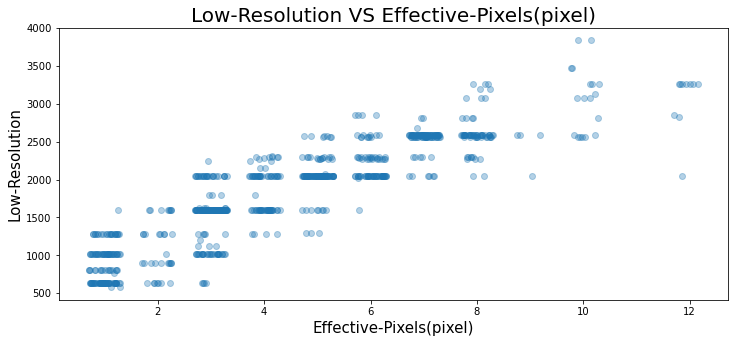

In [71]:
plt.figure(figsize=[12,5]);
sb.regplot(data=df1,y='Low_resolution',x='Effective_pixels',fit_reg=False,x_jitter=.3,scatter_kws={'alpha':1/3});
plt.title('Low-Resolution VS Effective-Pixels(pixel)',size=20);
plt.ylabel('Low-Resolution'  ,size=15);
plt.xlabel('Effective-Pixels(pixel)',size=15);


###### Observation:  

- From previous two plots,we can notice that effictive-pixels are highly related to max-resolution and low-resolution what makes sense, as resolution depends on camera shot quality, Since then, we can assure that high effective-pixels is enough info to check the three properties .

### Dimensions VS Weight(inc.batteries)

> > Q: are cameras' sizes related to cameras' batteries weight? As, for heavier inc.batteries we may expect larger cameras.



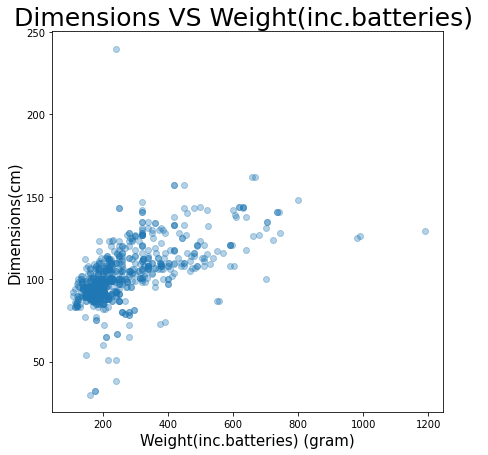

In [72]:
plt.figure(figsize=[7,7]),
sb.regplot(data=df1,x='Weight(inc.batteries)',y='Dimensions',fit_reg=False,x_jitter=.3,scatter_kws={'alpha':1/3});
plt.title('Dimensions VS Weight(inc.batteries) ',size=25);
plt.xlabel('Weight(inc.batteries) (gram)',size=15);
plt.ylabel('Dimensions(cm)',size=15);

###### Observation:  

> We can notice that camera weight "Weight(inc.batteries)" related to camera size "Dimensions" which is also rational for most data aggregated inbetween (70:150) for Dimensions and inbetween (100:500) for inc.batteries weight .

### Price VS Release-date


###### Trying to figure the answer of the same question out with other technological features ?

> > Q: Is change in price related to Cameras' production year? As modern ones may record higher prices ?



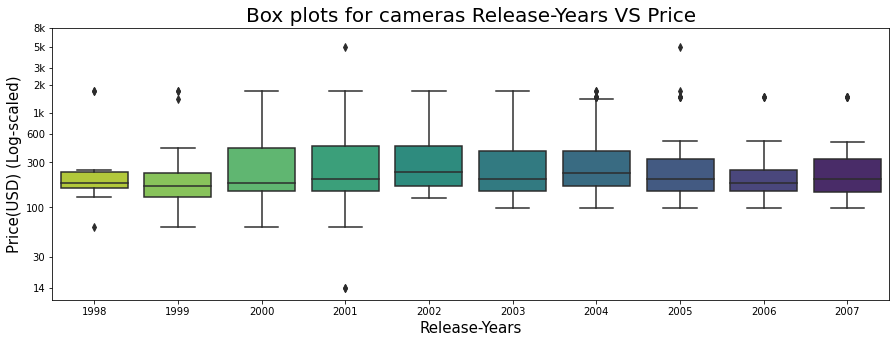

In [73]:
plt.figure(figsize=[15,5]);
sb.boxplot(data=df1,x='Release_date',y='log_price',palette='viridis_r');
plt.title('Box plots for cameras Release-Years VS Price',size=20);
a=np.log10([14,30,100,300,600,1000,2000,3000,5000,8000])
c=['14','30','100','300','600','1k','2k','3k','5k','8k']
plt.yticks(a,c);
plt.ylabel('Price(USD) (Log-scaled)'  ,size=15);
plt.xlabel('Release-Years',size=15);

In [74]:
ddd="'Olympus', 'Sony', 'Fujifilm', 'Nikon', 'Canon', 'Casio', 'Pentax','Panasonic', 'Kodak', 'Samsung', 'HP'"
dd=ddd.replace(',','|')
ddd
dff1=df1.query(" supplier_name == 'Olympus' or supplier_name == 'Sony' or supplier_name == 'Fujifilm' or supplier_name == 'Nikon' or supplier_name == 'Canon' or supplier_name == 'Casio' or supplier_name == 'Pentax' or supplier_name == 'Panasonic' or supplier_name == 'Kodak' or supplier_name == 'Samsung' or supplier_name == 'HP'")
dff1.reset_index(inplace=True)

dff2=df2.query(" supplier_name == 'Olympus' or supplier_name == 'Sony' or supplier_name == 'Fujifilm' or supplier_name == 'Nikon' or supplier_name == 'Canon' or supplier_name == 'Casio' or supplier_name == 'Pentax' or supplier_name == 'Panasonic' or supplier_name == 'Kodak' or supplier_name == 'Samsung' or supplier_name == 'HP'")
dff2.reset_index(inplace=True)

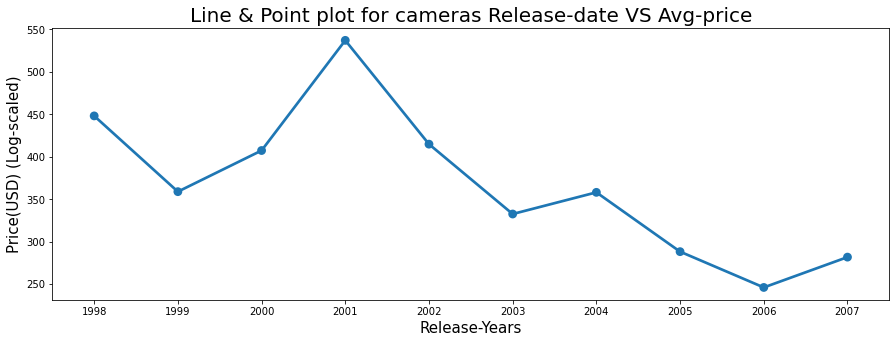

In [75]:
plt.figure(figsize=[15,5]);
sd=dff1.groupby(['Release_date'])['Price'].mean()
sd=sd.reset_index(name='Avg_price')
sb.pointplot(data=sd,x='Release_date',y='Avg_price');
plt.title('Line & Point plot for cameras Release-date VS Avg-price',size=20);
plt.ylabel('Price(USD) (Log-scaled)'  ,size=15);
plt.xlabel('Release-Years',size=15);

###### Observation:  

- From previous box plot, since release-year is ordinal type of data we shall find that price change according to release date is slight and not in ordinal way as it may rely on other features like manufacturing technology and materials prices over time and these can be summarized under dataset limitations, also. 
- But from plot we can generally recommend "2006" as best release year for purchasing a camera since it's a recent year and scores best price median, also have second most count of offered cameras what assures for variety also . 
- From previous lineplot i just assure previous finding as price change has no robust pattern across release years but we can generalize that price reduces gradually when moving forward with time , besides mentioning that highiest avg-price score has been recorded for "2001" year and lowest avg-price for "2006" year  .

### Price VS Supplier-name

> > Q: Is change in price related to Cameras' manufacturers? Since, Brand-Name always has impact on all markets and products around .


###### Modification : 
- To illustrate price change along with suppliers we need to apply a modification to our dataset, filtering only first 11 suppliers that dominate more than (85%) of data sothat, we shall make price change more significant.

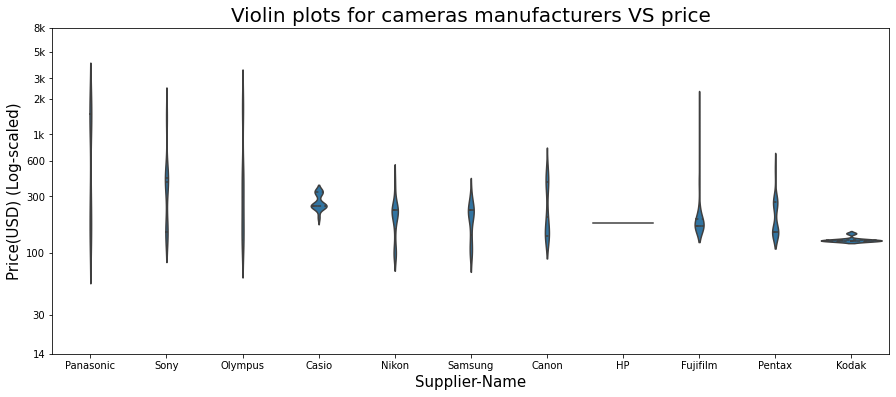

In [76]:
plt.figure(figsize=[15,6]);
order=dff1.groupby(['supplier_name'])['Price'].median().sort_values(ascending=False).index
sb.violinplot(data=dff1,x='supplier_name',y='log_price',order=order,inner='quartile',color=sb.color_palette()[0]);
plt.title('Violin plots for cameras manufacturers VS price',size=20);
a=np.log10([14,30,100,300,600,1000,2000,3000,5000,8000])
c=['14','30','100','300','600','1k','2k','3k','5k','8k']
plt.yticks(a,c);
plt.ylabel('Price(USD) (Log-scaled)'  ,size=15);
plt.xlabel('Supplier-Name',size=15);

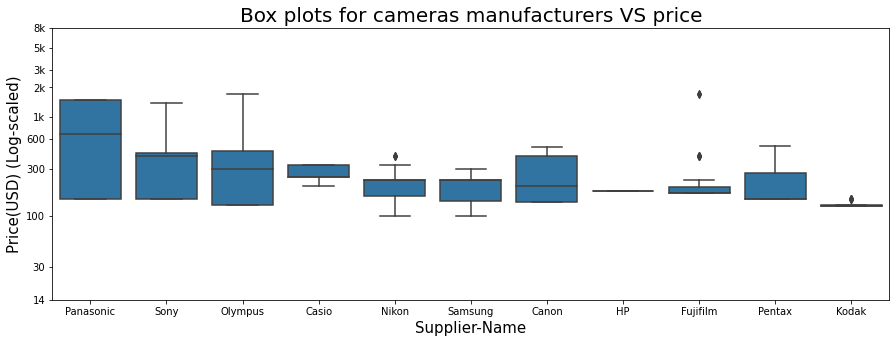

In [77]:
plt.figure(figsize=[15,5]);
order=dff1.groupby(['supplier_name'])['Price'].median().sort_values(ascending=False).index
sb.boxplot(data=dff1,x='supplier_name',y='log_price',order=order,color=sb.color_palette()[0]);
plt.title('Box plots for cameras manufacturers VS price',size=20);
a=np.log10([14,30,100,300,600,1000,2000,3000,5000,8000])
c=['14','30','100','300','600','1k','2k','3k','5k','8k']
plt.yticks(a,c);
plt.ylabel('Price(USD) (Log-scaled)'  ,size=15);
plt.xlabel('Supplier-Name',size=15);

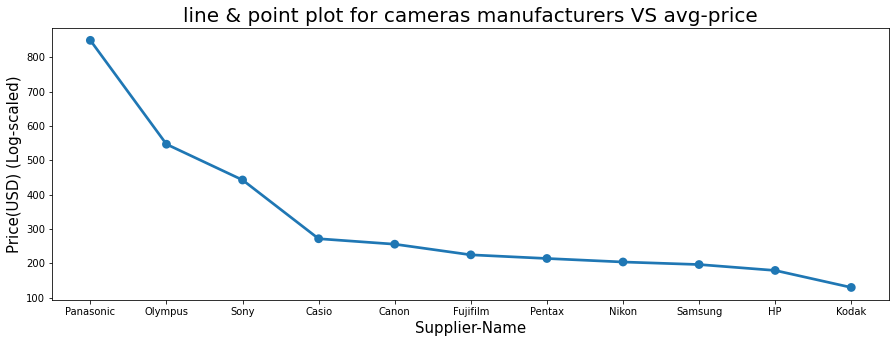

In [78]:
plt.figure(figsize=[15,5]);
sd=dff1.groupby(['supplier_name'])['Price'].mean()
sd=sd.reset_index(name='Avg_price')
order=dff1.groupby(['supplier_name'])['Price'].mean().sort_values(ascending=False).index
sb.pointplot(data=sd,x='supplier_name',y='Avg_price',order=order);
plt.title('line & point plot for cameras manufacturers VS avg-price',size=20);
plt.ylabel('Price(USD) (Log-scaled)'  ,size=15);
plt.xlabel('Supplier-Name',size=15);


###### Observation:  

- From previous violin plot, we can notice that price changes significantly with respect to cameras manufacturer as it records highest range of cameras prices for 'Panasonic', standard price for 'HP' and almost standard with lowest record for 'Kodak' and from violin plots distributions we can see that distribution of the parts along with price for each supplier almost uniform against prices except for 'HP','Kodak' has constant price range with whole distribution, and slightly deviated 'Casio'.
- From previous box plot, we also can have preliminary recommendations for 'Nikon' and 'Samsung' since, they have a good range of price and their distribution suggests that it makes sense to find variety of offered cameras' technological features within this low range of price .
- From previous line plot, We assures what we have already illustrated, that price changes significantly with respect to supplier, With 'Panasonic', 'Olympus', 'Sony' for highest price records .

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> We can assure that change in price is only related with respect to suppliers what assures limitations of data for other important features that are related to price change like 'Life_cycle'.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> We can notice that max-resolution are related to low-resolution.

> We can notice that effictive-pixels are propotionally related to max-resolution and low-resolution which are related in nature what makes sense as resolution depends on camera shot quality.

> We can notice that camera weight "Weight(inc.batteries)" related to camera size "Dimensions" which is also rational .

## Multivariate Exploration

###### From Bivariate Exploration : We found that price is only related to supplier, so i prefer investigating each supplier offering technological features distributed along with respect to price and that what we are going on for next section .

> > Question: How is price related to technological features within each manufacturer ? Since, we try to record pattern
for change in price  by having a deeper look within each manufacturer data to eliminate change in price with respect to brands and record other relationships, if exists. 


### Faceting data of price based on supplier as output of max-resolution


> > Q: Is change in price related to cameras' max-resolution within each suppliers data? 


<Figure size 864x360 with 0 Axes>

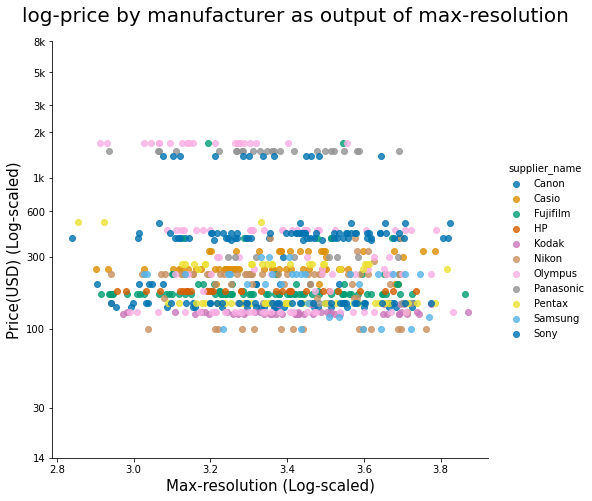

In [79]:
plt.figure(figsize=[12,5]);
g=sb.FacetGrid(data=dff2,hue='supplier_name',height=7,palette='colorblind')
g.map(sb.regplot,'log_Max_resolution','log_price',fit_reg=False,x_jitter=.3);
plt.suptitle('log-price by manufacturer as output of max-resolution',size=20);
a=np.log10([14,30,100,300,600,1000,2000,3000,5000,8000])
c=['14','30','100','300','600','1k','2k','3k','5k','8k']
plt.yticks(a,c);
cc=np.log10(maxx)
aa=['{}'.format(t) for t in maxx]
g.add_legend();
g.tight_layout();
plt.ylabel('Price(USD) (Log-scaled)'  ,size=15);
plt.xlabel('Max-resolution (Log-scaled)',size=15);


### From previous faceting plot we noticed that:

> In general,"Kodak" and "HP" has lowest price grades and also almost constant along whole max-resolution range but it doesn't make sense, so i think best choices for max resolution involves ('Nikon','Canon','Fujifilm','Samsung') as they have a various range of max resolution while maintaining price at lower bounds

> "Olympus" and "Panasonic" are good choices as they have two gapped groups one across lower prices of (100:600) and another across higher prices ">1500" , so it's another proof for out approache which states that price doesn't rely on tech features but has other missing dependent variables, and this is more cleared within previous two plots.

> > We can assures that even within each supplier data same price is offerd for large range options of Max-Resolution .

<Figure size 1080x2880 with 0 Axes>

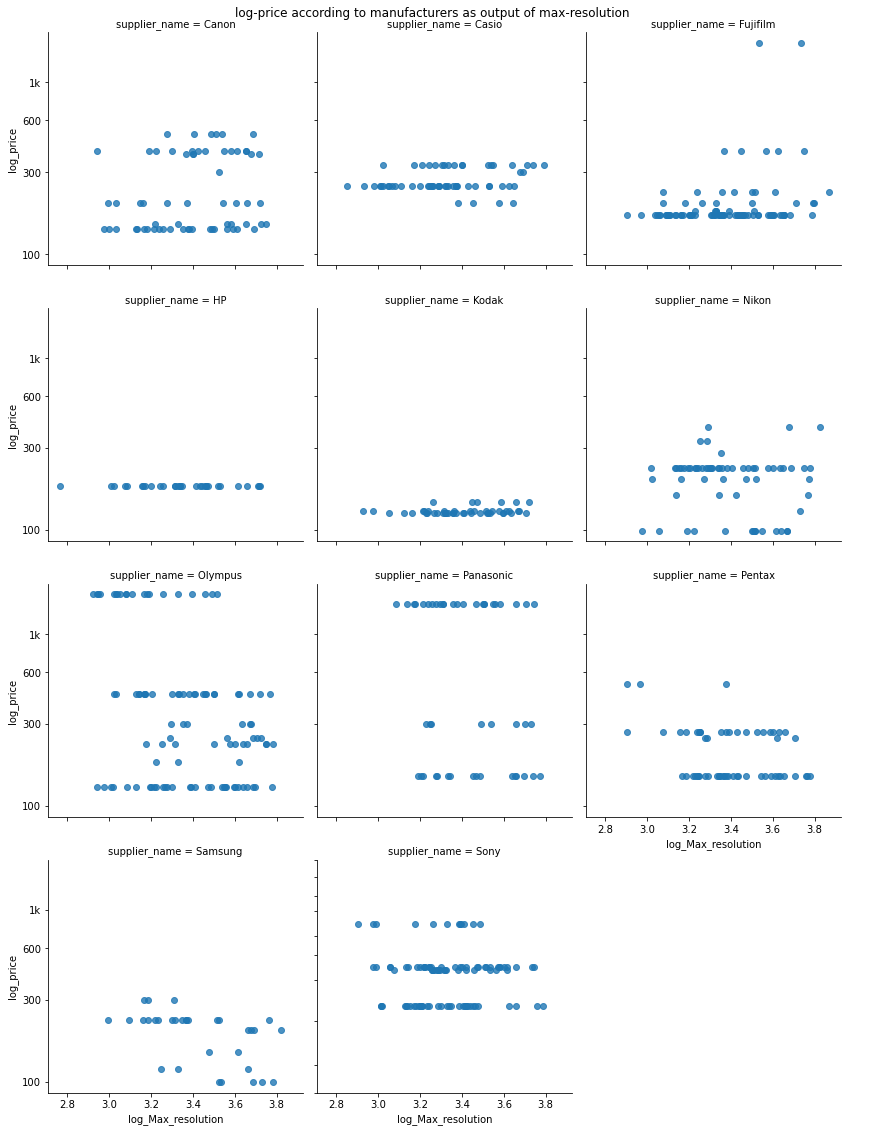

In [80]:
plt.figure(figsize=[15,40]);
g=sb.FacetGrid(data=dff2,col='supplier_name',height=4,col_wrap=3,margin_titles=True)
g.map(sb.regplot,'log_Max_resolution','log_price',fit_reg=False,x_jitter=.3);
plt.suptitle('log-price according to manufacturers as output of max-resolution');
a=np.log10([14,30,100,300,600,1000,2000,3000,5000,8000])
c=['14','30','100','300','600','1k','2k','3k','5k','8k']
plt.yticks(a,c);
cc=np.log10(maxx)
aa=['{}'.format(t) for t in maxx]
g.add_legend();
g.tight_layout();

###### Dividng Olympus data based on price (<600) & (>=600), Assuring what we have recorder formerly by having a deepper on Olympus data only and answering the same question.

> > Q: Is change in price related to cameras' max-resolution within Olympus data? 



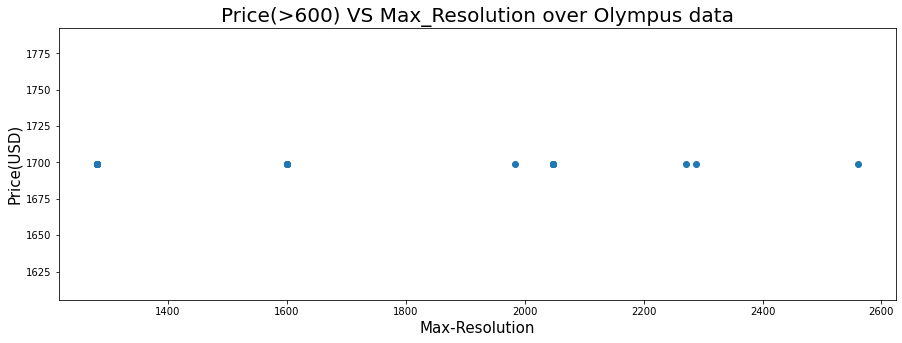

In [81]:
plt.figure(figsize=[15,5]);
re=dff1.query('supplier_name == "Olympus"')
re1=re.query('Price >= 600')
re2=re.query('Price < 600')
plt.scatter(data=re1,x='Max_resolution',y='Price');
plt.title('Price(>600) VS Max_Resolution over Olympus data',size=20);
plt.ylabel('Price(USD)'  ,size=15);
plt.xlabel('Max-Resolution',size=15);

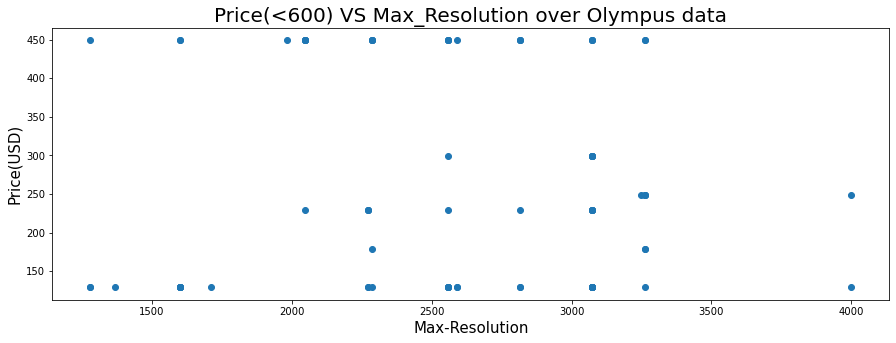

In [82]:
plt.figure(figsize=[15,5]);
plt.scatter(data=re2,x='Max_resolution',y='Price');
plt.title('Price(<600) VS Max_Resolution over Olympus data',size=20);
plt.ylabel('Price(USD)'  ,size=15);
plt.xlabel('Max-Resolution',size=15);

###### Observation:  

- I have divided Olympus data to two groups one with price > 600USD and another with price < 600USD. Afterthat, i have plotted both, what illustrated more, that both are sharing almost same range of max-resolution, hence we can expect to have same results with low-resolution and effective-pixels since they relate. 
- We can assures what we have reached from former facet plot, that even within only Olympus data we have found that same price is offerd for large range options of Max-Resolution . and that what we are going to dive in more depth with, regarding some other features. Next!

### Faceting data of price based on supplier as output of low-resolution

> > Q:> > Q: Is change in price related to cameras' low-resolution within each suppliers data? 


<Figure size 864x360 with 0 Axes>

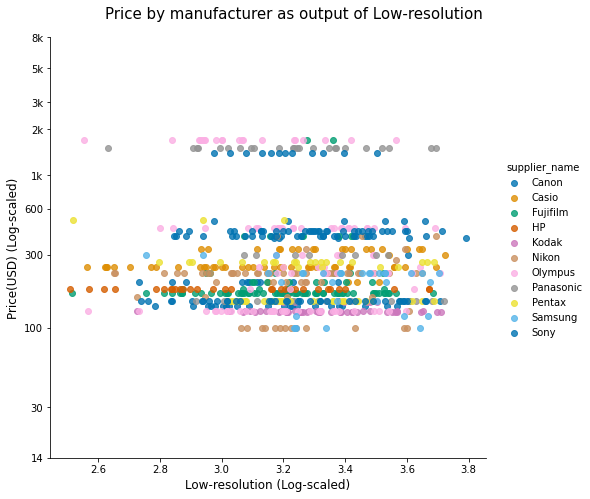

In [83]:
plt.figure(figsize=[12,5]);
g=sb.FacetGrid(data=dff2,hue='supplier_name',height=7,palette='colorblind')
g.map(sb.regplot,'log_Low_resolution','log_price',fit_reg=False,x_jitter=.3);
plt.suptitle('Price by manufacturer as output of Low-resolution',size=15);
a=np.log10([14,30,100,300,600,1000,2000,3000,5000,8000])
c=['14','30','100','300','600','1k','2k','3k','5k','8k']
plt.yticks(a,c);
cc=np.log10(low)
aa=['{}'.format(t) for t in low]
g.add_legend();
g.tight_layout();
plt.ylabel('Price(USD) (Log-scaled)'  ,size=12);
plt.xlabel('Low-resolution (Log-scaled)',size=12);


#### From previous faceting plot we noticed that:

> In general,"Kodak" and "HP" has lowest price grades and also almost constant along whole low-resolution range but it doesn't make sense, so i think best choices for low resolution involves ('Nikon','Canon','Fujifilm','Samsung') as they have a various range of low resolution while maintaining price at lower bounds

> "Olympus" and "Panasonic" are good choices as they have two gapped groups one across lower prices of (100:600) and another across higher prices ">1500" , so it's another proof for our approache which states that price doesn't rely on tech features but has other missing dependent variables.

> > We can assures that even within each supplier data same price is offerd for large range options of Low-Resolution .

C:\Users\ENG\anaconda3\envs\life_cycle\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x2880 with 0 Axes>

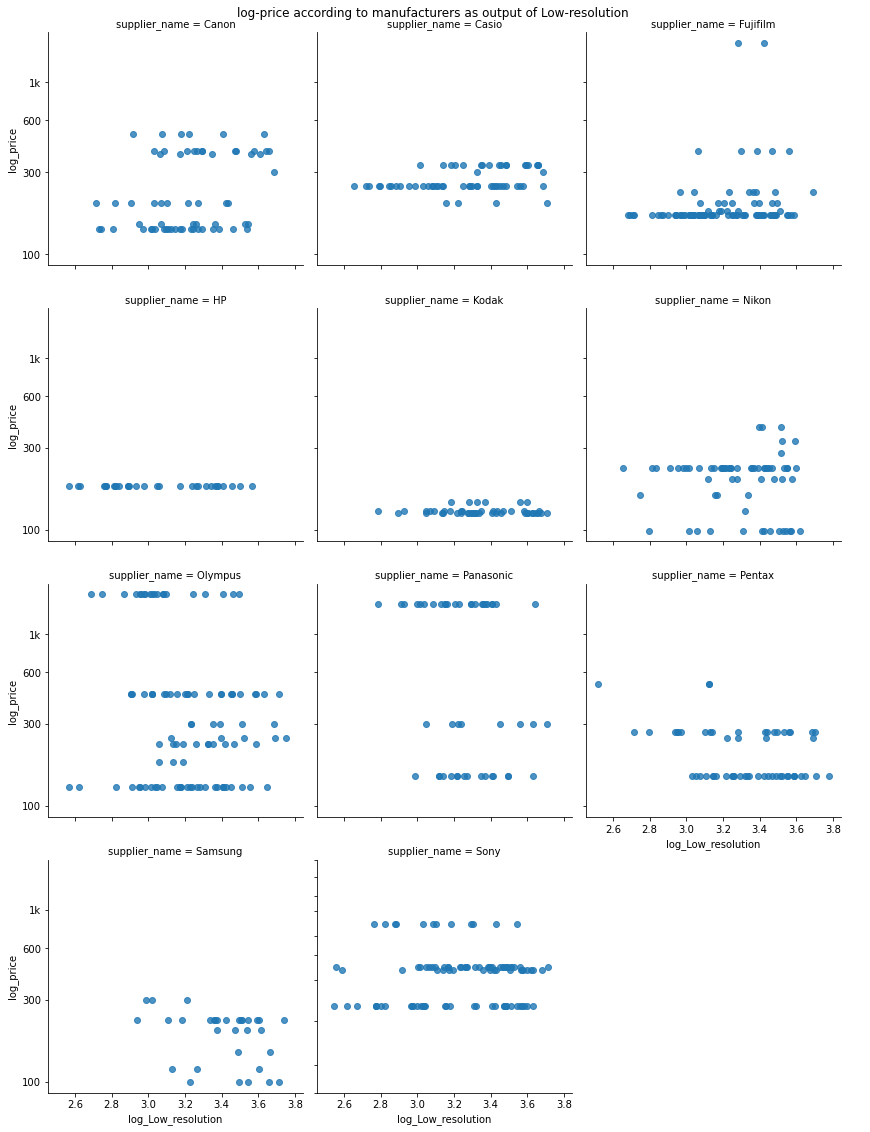

In [84]:
plt.figure(figsize=[15,40]);
g=sb.FacetGrid(data=dff2,col='supplier_name',size=4,col_wrap=3,margin_titles=True)
g.map(sb.regplot,'log_Low_resolution','log_price',fit_reg=False,x_jitter=.3);
plt.suptitle('log-price according to manufacturers as output of Low-resolution');
a=np.log10([14,30,100,300,600,1000,2000,3000,5000,8000])
c=['14','30','100','300','600','1k','2k','3k','5k','8k']
plt.yticks(a,c);
cc=np.log10(low)
aa=['{}'.format(t) for t in low]
g.add_legend();
g.tight_layout();

### Faceting data of price based on supplier as output of effective-pixels

> > Q: Is change in price related to cameras' Effective-Pixels within each supplier data? 


<Figure size 864x360 with 0 Axes>

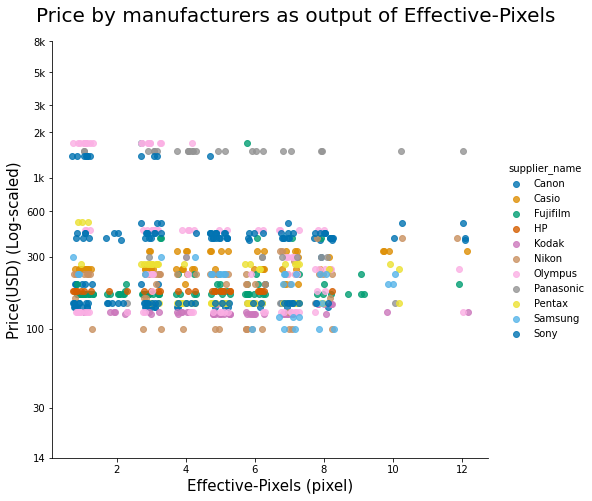

In [85]:
plt.figure(figsize=[12,5]);
g=sb.FacetGrid(data=dff2,hue='supplier_name',height=7,palette='colorblind')
g.map(sb.regplot,'Effective_pixels','log_price',fit_reg=False,x_jitter=.3);
plt.suptitle('Price by manufacturers as output of Effective-Pixels',size=20);
a=np.log10([14,30,100,300,600,1000,2000,3000,5000,8000])
c=['14','30','100','300','600','1k','2k','3k','5k','8k']
plt.yticks(a,c);
cc=np.log10(eff)
aa=['{}'.format(t) for t in eff]
g.add_legend();
g.tight_layout();
plt.ylabel('Price(USD) (Log-scaled)'  ,size=15);
plt.xlabel('Effective-Pixels (pixel)',size=15);



### From previous faceting plot we noticed that:

> In general,"Kodak" and "HP" has lowest price grades and also almost constant along whole low-resolution range but it doesn't make sense, so i think best choices for low resolution involves ('Pentax','Casio','Fujifilm','Samsung') as they have a various range of low resolution while maintaining price at lower bounds

> "Olympus" and "Panasonic" have two gapped groups one across lower prices of (100:600) and another across higher prices ">1500" but, for "Panasonic" to some extent it makes sense since, their high prices includes higher effective pixels options while "Olympus" results doesn't make sense since, their high prices includes lower effective pixels options .

> > We can assure that even within each supplier data same price is offerd for large range options of Effective-Pixels, or in other words, even by holding Brand-Name effect we still have not correlated relationship between change in price and Effective-Pixels.

C:\Users\ENG\anaconda3\envs\life_cycle\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x2880 with 0 Axes>

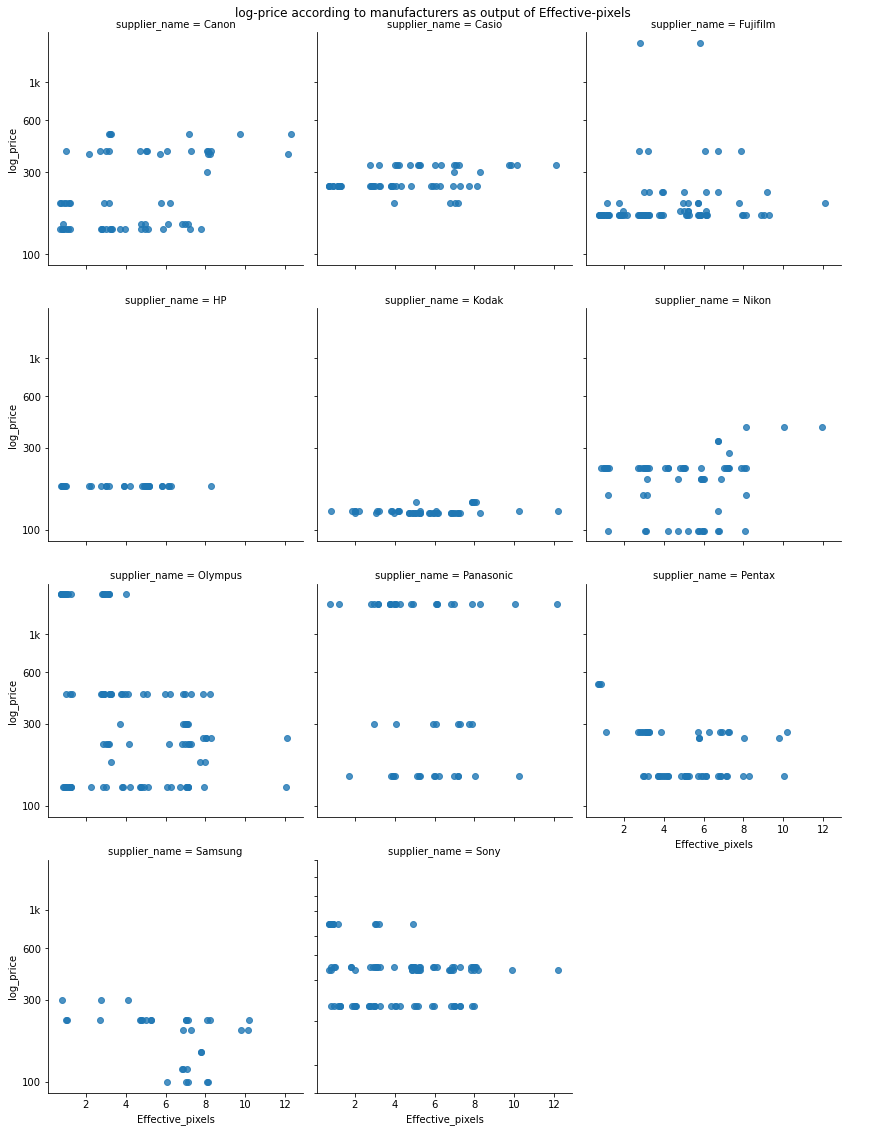

In [86]:
plt.figure(figsize=[15,40]);
g=sb.FacetGrid(data=dff2,col='supplier_name',size=4,col_wrap=3,margin_titles=True)
g.map(sb.regplot,'Effective_pixels','log_price',fit_reg=False,x_jitter=.3);
plt.suptitle('log-price according to manufacturers as output of Effective-pixels');
a=np.log10([14,30,100,300,600,1000,2000,3000,5000,8000])
c=['14','30','100','300','600','1k','2k','3k','5k','8k']
plt.yticks(a,c);
cc=np.log10(eff)
aa=['{}'.format(t) for t in eff]
g.add_legend();
g.tight_layout();

### Faceting data of price based on supplier as output of Storage-included

> > Q: Is change in price related to cameras' storage-included options within each suppliers data? 



<Figure size 1080x360 with 0 Axes>

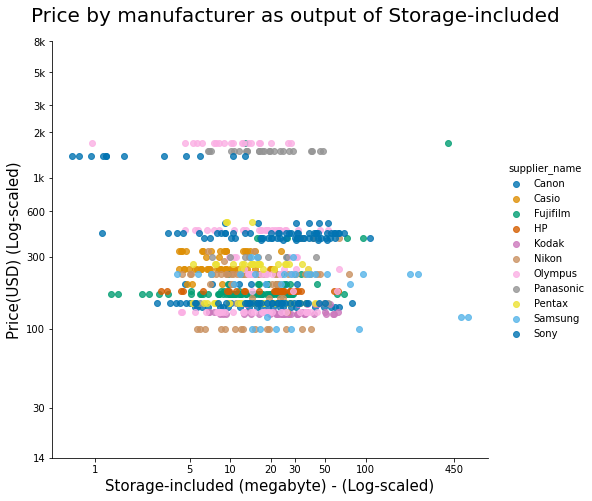

In [87]:
plt.figure(figsize=[15,5]);
g=sb.FacetGrid(data=dff2,hue='supplier_name',height=7,palette='colorblind')
g.map(sb.regplot,'log_Storage_included','log_price',fit_reg=False,x_jitter=.3);
plt.suptitle('Price by manufacturer as output of Storage-included',size=20);
a=np.log10([14,30,100,300,600,1000,2000,3000,5000,8000])
c=['14','30','100','300','600','1k','2k','3k','5k','8k']
plt.yticks(a,c);
cc=np.log10(stor)
aa=['{}'.format(t) for t in stor]
g.add_legend();
g.tight_layout();
plt.xticks(cc,aa);
plt.ylabel('Price(USD) (Log-scaled)'  ,size=15);
plt.xlabel('Storage-included (megabyte) - (Log-scaled)',size=15);


###### From previous faceting plot we noticed that:

> In general,"Kodak" and "HP" has lowest price grades and also almost constant along whole low-resolution range but it doesn't make sense, so i think best choice for Camera storage involve ('Samsung') as it has a high various range of storage-included while maintaining price at lower bounds

> "Sony" doesn't make sense since, higher price points located at lower storage-included range, while high outliers of "Fujifilm" are rational since, they tend to highest storage option.


> > We can assure that even within each supplier data same price is offerd for large range options of Storage-included .

C:\Users\ENG\anaconda3\envs\life_cycle\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x2880 with 0 Axes>

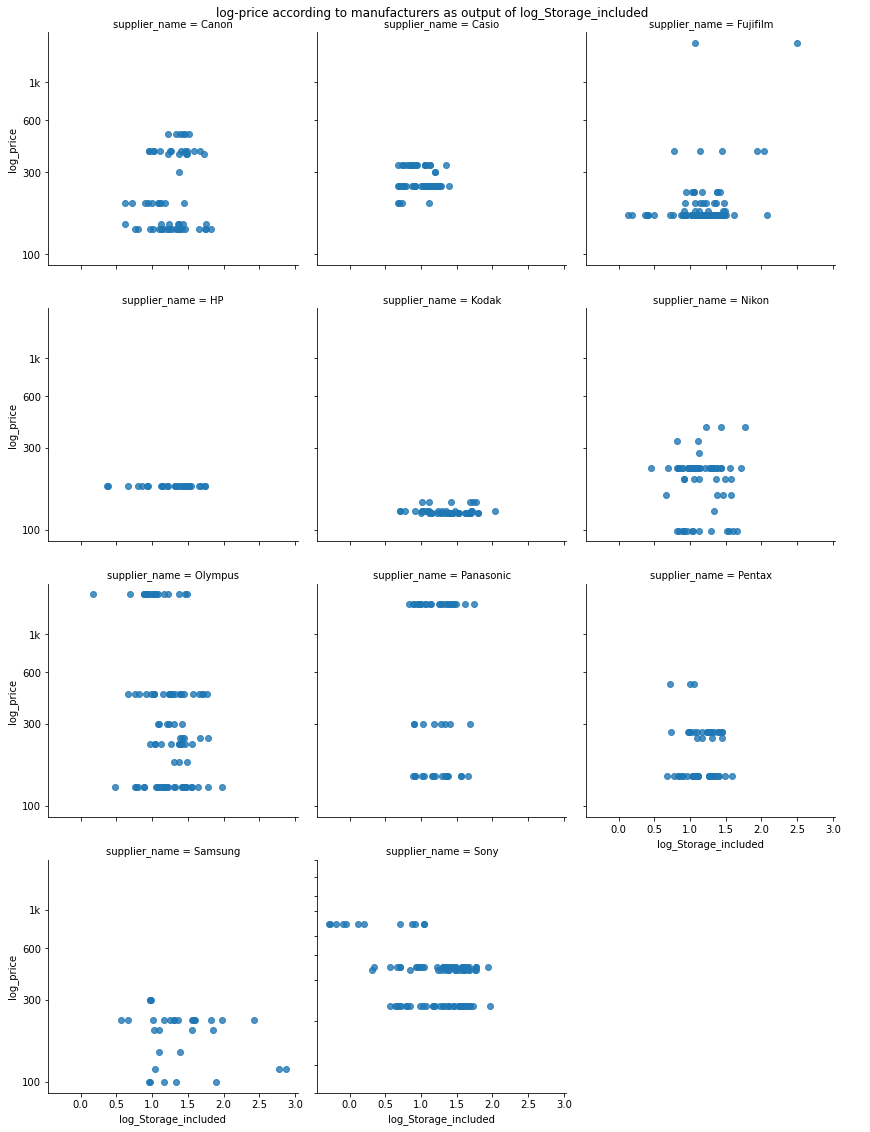

In [88]:
plt.figure(figsize=[15,40]);
g=sb.FacetGrid(data=dff2,col='supplier_name',size=4,col_wrap=3,margin_titles=True)
g.map(sb.regplot,'log_Storage_included','log_price',fit_reg=False,x_jitter=.3);
plt.suptitle('log-price according to manufacturers as output of log_Storage_included');
a=np.log10([14,30,100,300,600,1000,2000,3000,5000,8000])
c=['14','30','100','300','600','1k','2k','3k','5k','8k']
plt.yticks(a,c);
cc=np.log10(stor)
aa=['{}'.format(t) for t in stor]
g.add_legend();
g.tight_layout();

##### Plotting heatmap for suppliers VS release-year counting for Avg-price .

> > Q: Is change in price related to cameras' production year within each supplier data? 



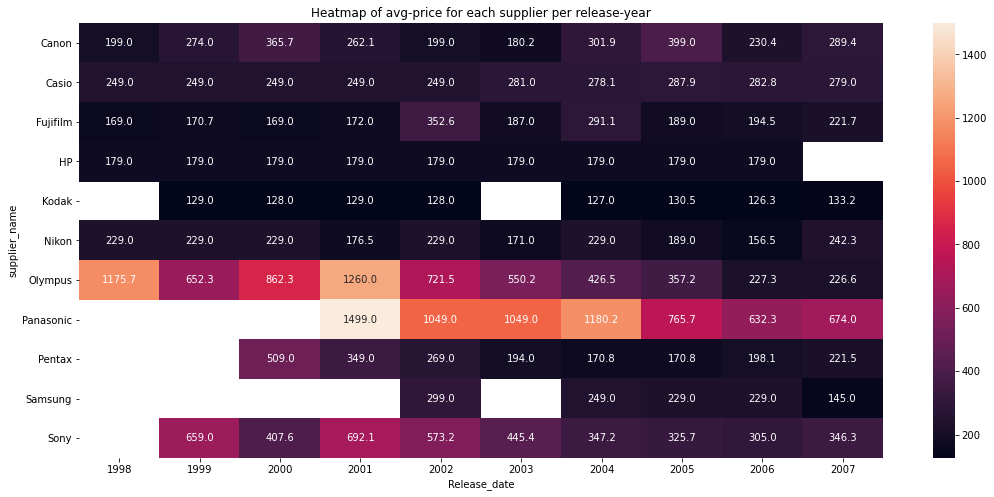

In [89]:
plt.figure(figsize=[18,8]);
dr=dff1.groupby(['supplier_name','Release_date'])['Price'].mean()
dr=dr.reset_index(name='Avg_price')
dr=pd.pivot(data=dr,index='supplier_name',columns='Release_date',values='Avg_price')
sb.heatmap(dr,annot=True,fmt='0.1f');
plt.title('Heatmap of avg-price for each supplier per release-year');


#### From previous heatmap we can illustrate the price regions as indicated below :

> High price regions, mainly in "Panasonic" .

> High price regions, till 2003 for "Olympus" and "Sony" while price decreasing along within (2004:2007).

> Starting high price offering interprets irreasonability for some suppliers to have higher prices for lower properities .

> price change has no robust pattern across release years but we can generalize that price reduces gradually when moving forward with time .

> > We can assure that Release-Years has no significant pattern of price change.  

In [90]:
#Trying to find best camera offered based on effective pixels and storage included
asd=df1.sort_values(by='Price')
e=asd.Effective_pixels.max()
index_1=asd[asd['Effective_pixels'] == asd.Effective_pixels.max()].index
ep=asd.loc[index_1]
s=asd.Storage_included.max()
index_2=asd[asd['Storage_included'] == asd.Storage_included.max()].index
sp=asd.loc[index_2]
lp=asd.Price.min()

In [91]:
#Best offered effective-pixels
print(e)
print(ep)

12.0
     Release_date  Max_resolution  Low_resolution  Effective_pixels  \
440          2007          4000.0          2832.0              12.0   
656          2007          4000.0          2048.0              12.0   
258          2007          4000.0          2848.0              12.0   
669          2007          4000.0          3264.0              12.0   
140          2007          4000.0          3264.0              12.0   
119          2007          4000.0          3264.0              12.0   
532          2007          4000.0          3264.0              12.0   
994          2007          4000.0          3264.0              12.0   
71           2007          4000.0          3264.0              12.0   
694          2007          4000.0          3264.0              12.0   

     Zoom_wide(W)  Zoom_tele(T)  Normal_focus_range  Macro_focus_range  \
440          35.0         175.0                60.0               10.0   
656          35.0         105.0                60.0              

In [92]:
#best offered storages
print(s)
print(sp)

450.0
     Release_date  Max_resolution  Low_resolution  Effective_pixels  \
858          2007          3072.0          2592.0               7.0   
865          2007          3072.0          2592.0               7.0   

     Zoom_wide(W)  Zoom_tele(T)  Normal_focus_range  Macro_focus_range  \
858          38.0         114.0                80.0                5.0   
865          28.0         101.0                80.0                5.0   

     Storage_included  Weight(inc.batteries)  Dimensions  Price supplier_name  \
858             450.0                  210.0       101.0  119.0       Samsung   
865             450.0                  210.0       105.0  119.0       Samsung   

    device_name  log_price  
858          i7   2.075547  
865         L74   2.075547  


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From Multivariate investigations we can outline that, price changes within supplier do not depend on technological features. since, they share the same technological ranges within different price ranges .

> > Hence, we still have supplier-name only the impactful feature on change in price. 

## Other Approachs : 

> Best year of price rating is "2006" and for variety of many cameras offerings .

> Best choice of supplier based on important technological features of ('resolution', 'Effective-pixels' and 'Storage-included') and putting lowest price range in consideration is "Samsung" .

> Otherwise, your choice will be independent of technological features regarding price and your choice would just be a matter of choosing your favorite trusted brand as according to this dataset price changes only based on supplier .


## Other Suggestions :

> While best camera choice based on this dataset regarding Effective-Pixels since, it has always absolute desire to be maximum and lowest possible Price is : "Z1275" camera from "Kodak" as it has highest Effective-Pixels (12 megapixels) and lowest possible Price (119 USD) and highest possible Storage (64 megabytes).

> While best camera choice based on this dataset regarding Storage-included since, it has always absolute desire to be maximum and lowest possible Price is : "i7" camera from "Samsung" as it has highest Storage-included (450 megabytes) and lowest possible Price (119 USD) and highest possible Storage (7 megapixels).



### Were there any interesting or surprising interactions between features?

> Yes, unlogical interpretation of interacted data as some suppliers offer higher price products with lower technological features which doesn't make sense, what outweighs our approache which states dataset limitations of missing price dependent features .

> But, last heatmap plot justified that starting with high price offering interprets irreasonability for some suppliers to have higher prices for lower properities as technology could get more enhanced and cheaper cross the time .

#### For further conclusions:
> > For machine learning algorithm  to predict price, i am afraid we have dependent features lackage as we only have 'supplier-name' to put in consideration.

> > For hypothesis testing to statistically figure out best overall supplier that guarantee attractive price range or average for overall offered cameras assuming this dataset as a sample of aggregations, we can use only supplier-name and price variables .


> Cameras dataset source : https://www.kaggle.com/crawford/1000-cameras-dataset

In [93]:
df1.to_csv('df1.csv',index=False)
df2.to_csv('df2.csv',index=False)
dff1.to_csv('dff1.csv',index=False)
dff2.to_csv('dff2.csv',index=False)